# Preparing the dataset for hippocampus segmentation

In [1]:
# Import the following libraries that we will use: nibabel, matplotlib, numpy
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
from glob import glob
import scipy.ndimage as nd
import seaborn as sns

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI). Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [2]:
# Nibabel can present image data as a Numpy array by calling get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array.

# Load images and a segmentation masks and inspect a few
path = '../data/TrainingSet'
images = glob(os.path.join(path, 'images', '*.nii.gz'))
labels = glob(os.path.join(path, 'labels', '*.nii.gz'))

image = nib.load(path+'/images/hippocampus_001.nii.gz').get_fdata()
label = nib.load(path+'/labels/hippocampus_001.nii.gz').get_fdata()
print('image_001: ', image.shape, label.shape)

image_42 = nib.load(path+'/images/hippocampus_042.nii.gz').get_fdata()
label_42 = nib.load(path+'/labels/hippocampus_042.nii.gz').get_fdata()
print('image_42: ', image_42.shape, label_42.shape)

image_251 = nib.load(path+'/images/hippocampus_251.nii.gz').get_fdata()
label_251 = nib.load(path+'/labels/hippocampus_251.nii.gz').get_fdata()
print('image_251: ', image_251.shape, label_251.shape)

image_001:  (35, 51, 35) (35, 51, 35)
image_42:  (37, 52, 34) (37, 52, 34)
image_251:  (36, 58, 28) (36, 58, 28)


Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [4]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms 
# to visualize some of these volumes
def display_volume_slices(img, w, h):
    plot_w = w
    plot_h = h

    fig, ax = plt.subplots(plot_h, plot_w, figsize=[35,35])

    for i in range(plot_w*plot_h):
        plt_x = i % plot_w
        plt_y = i // plot_w
        if (i < len(img)):
            ax[plt_y, plt_x].set_title(f"slice {i}")
            ax[plt_y, plt_x].imshow(img[i], cmap='gray')
        ax[plt_y, plt_x].axis("off")

    plt.show()

### 3D Slicer - Sagittal Plane

#### Image 001

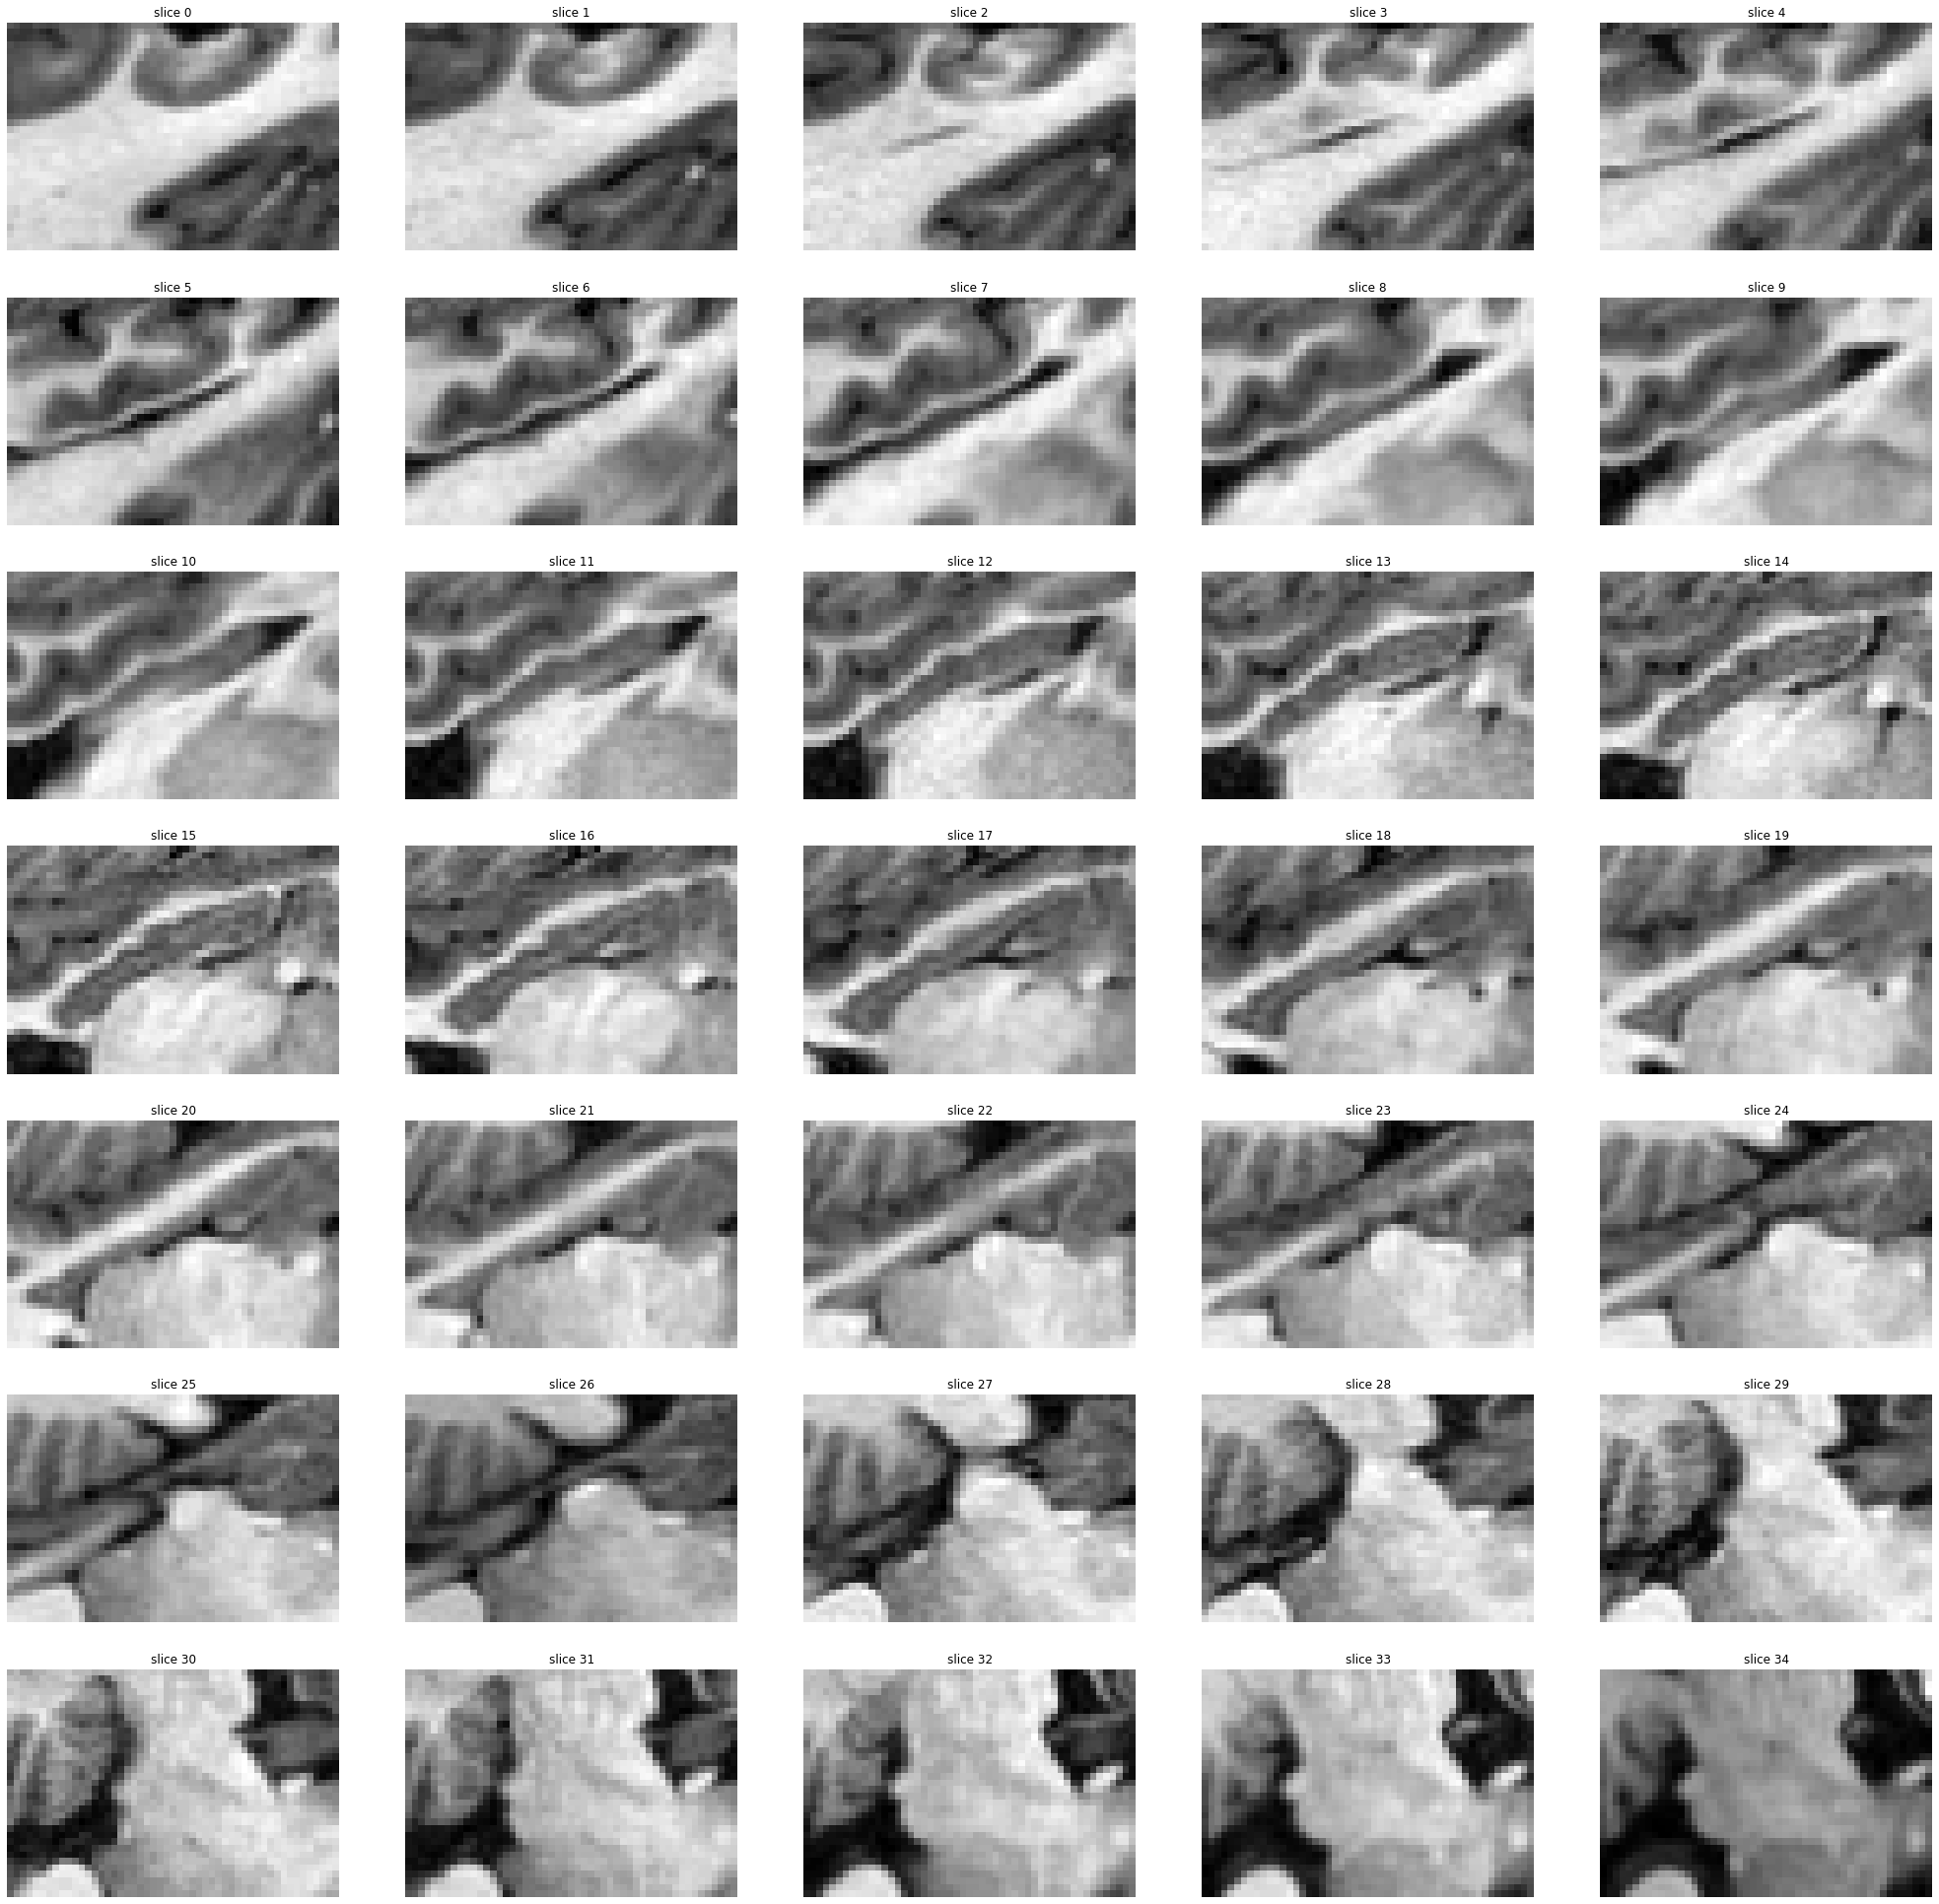

In [5]:
# view image 001
display_volume_slices(np.transpose(image,(0,2,1)), 5,7)

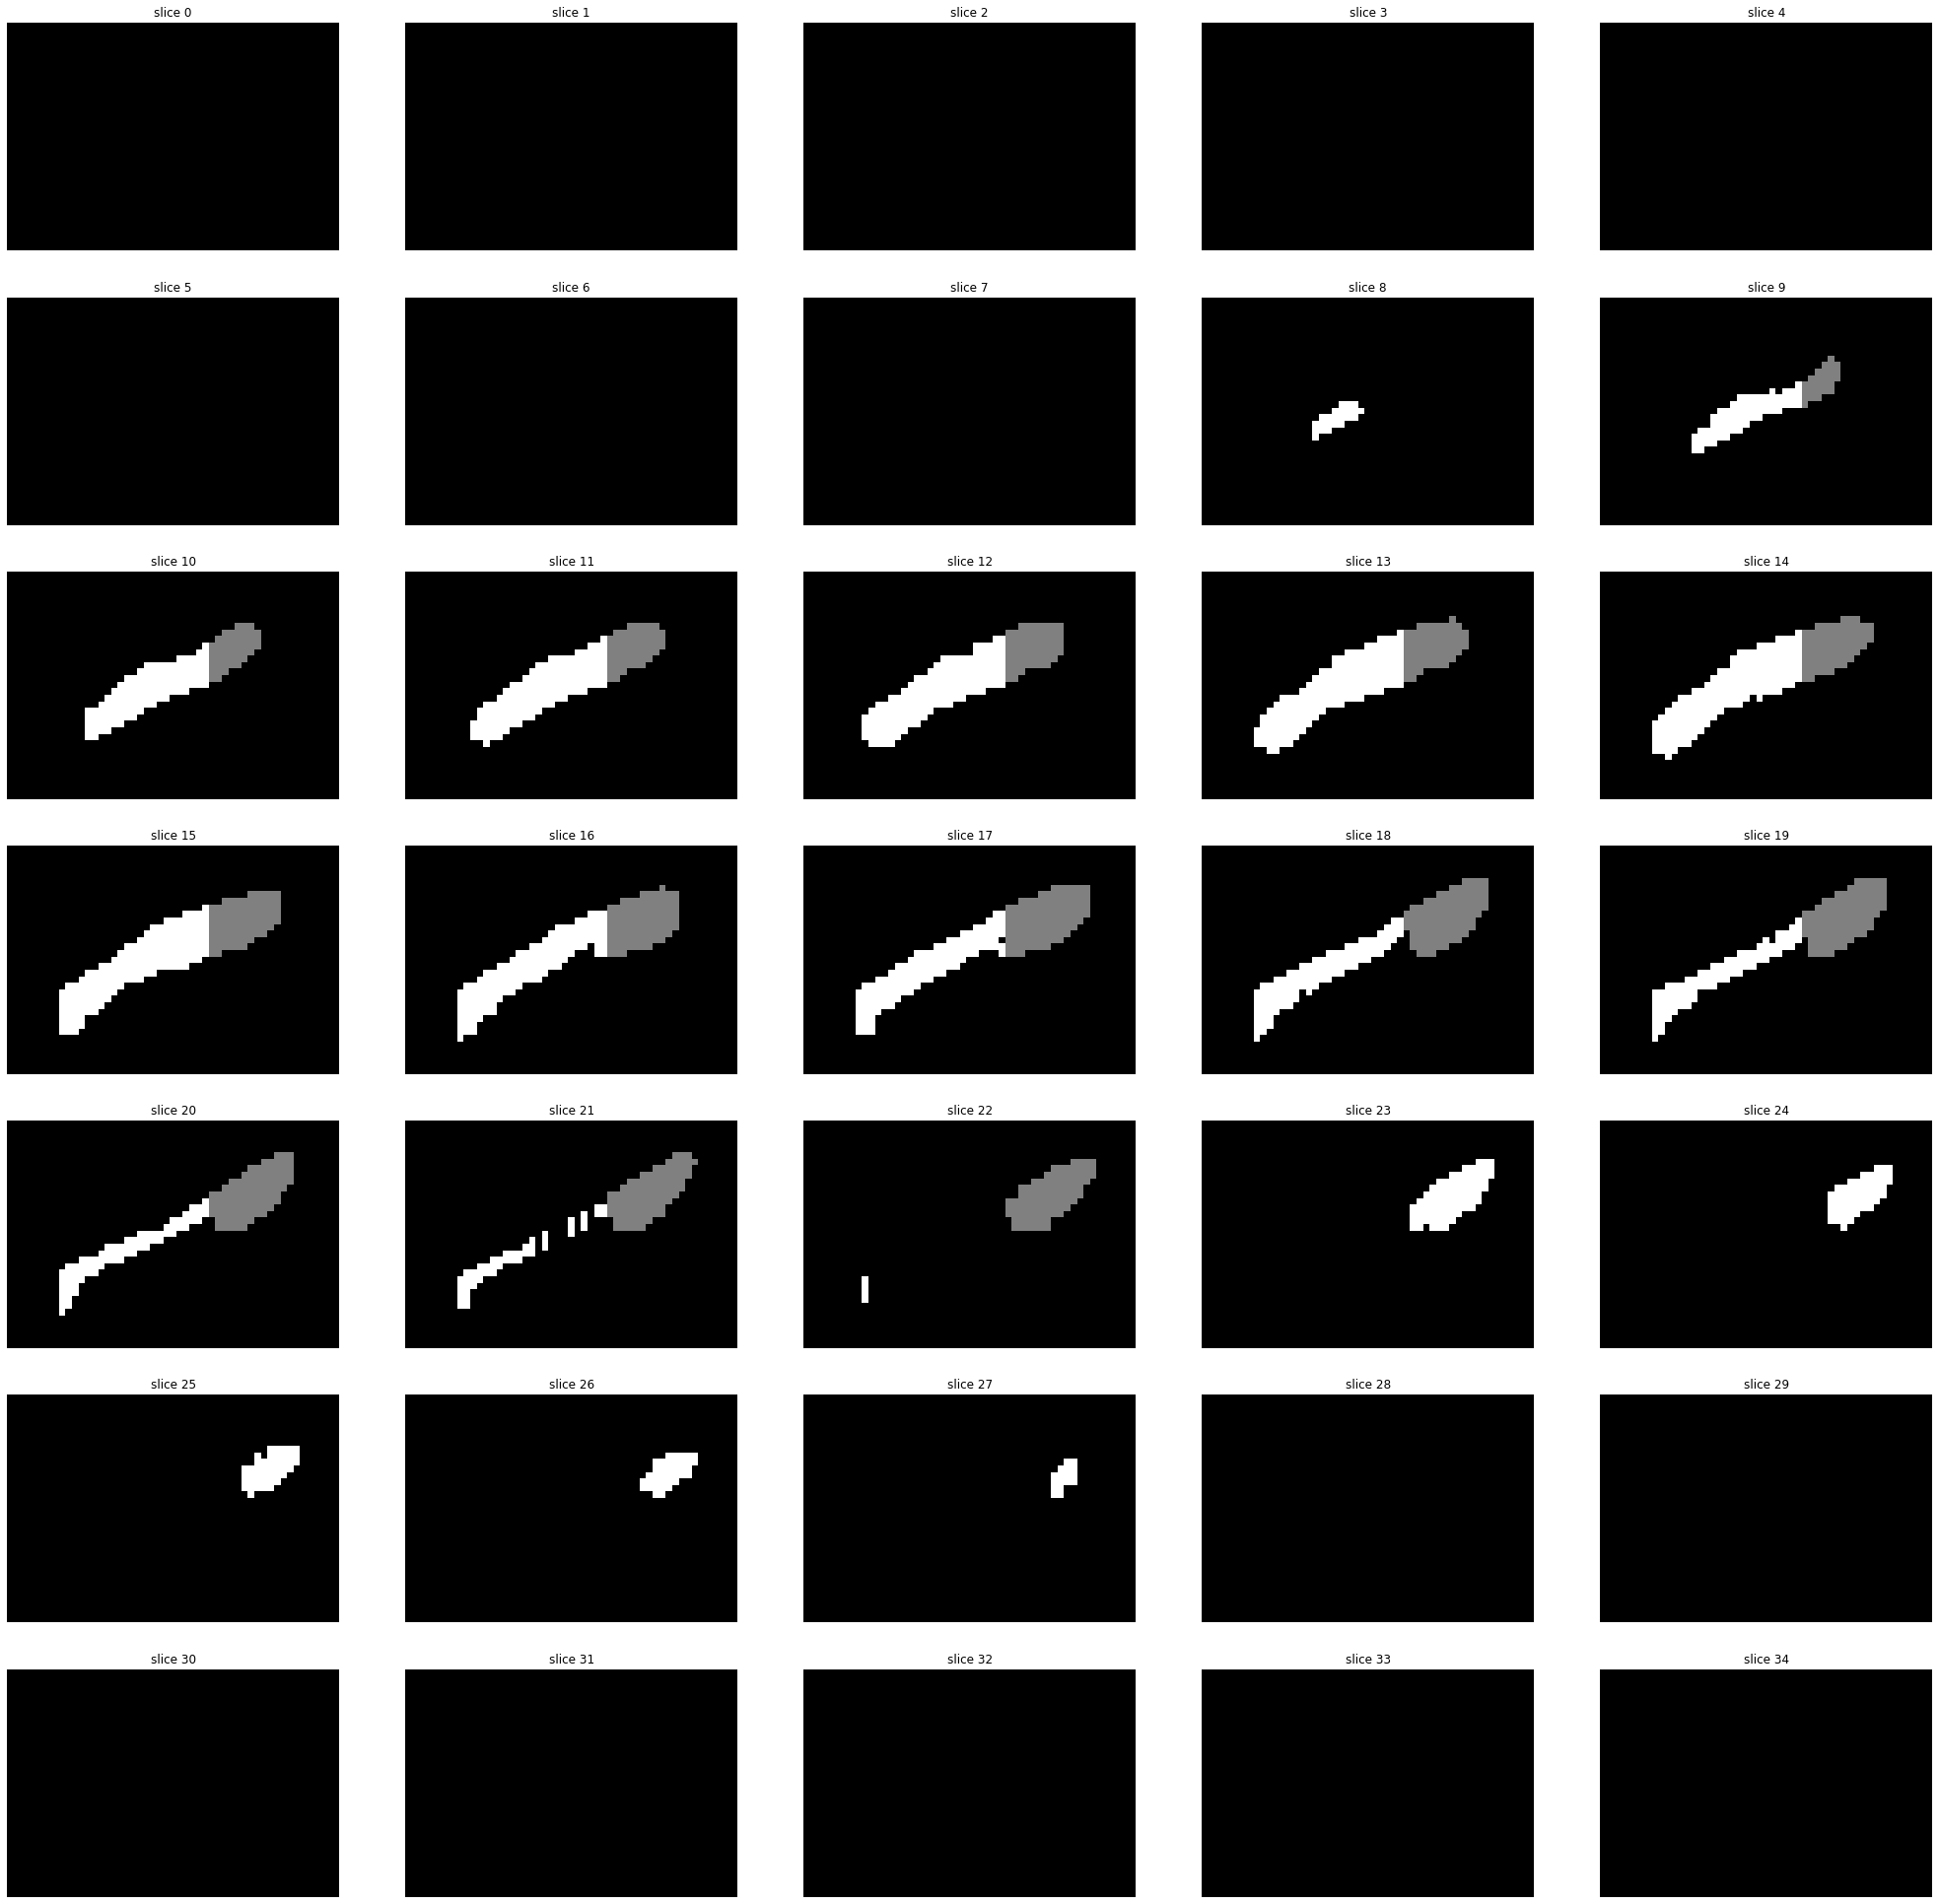

In [6]:
# view labels
display_volume_slices(np.transpose(label, (0,2,1)), 5,7)

### 3D Slicer - Coronal Plane

#### Image 001

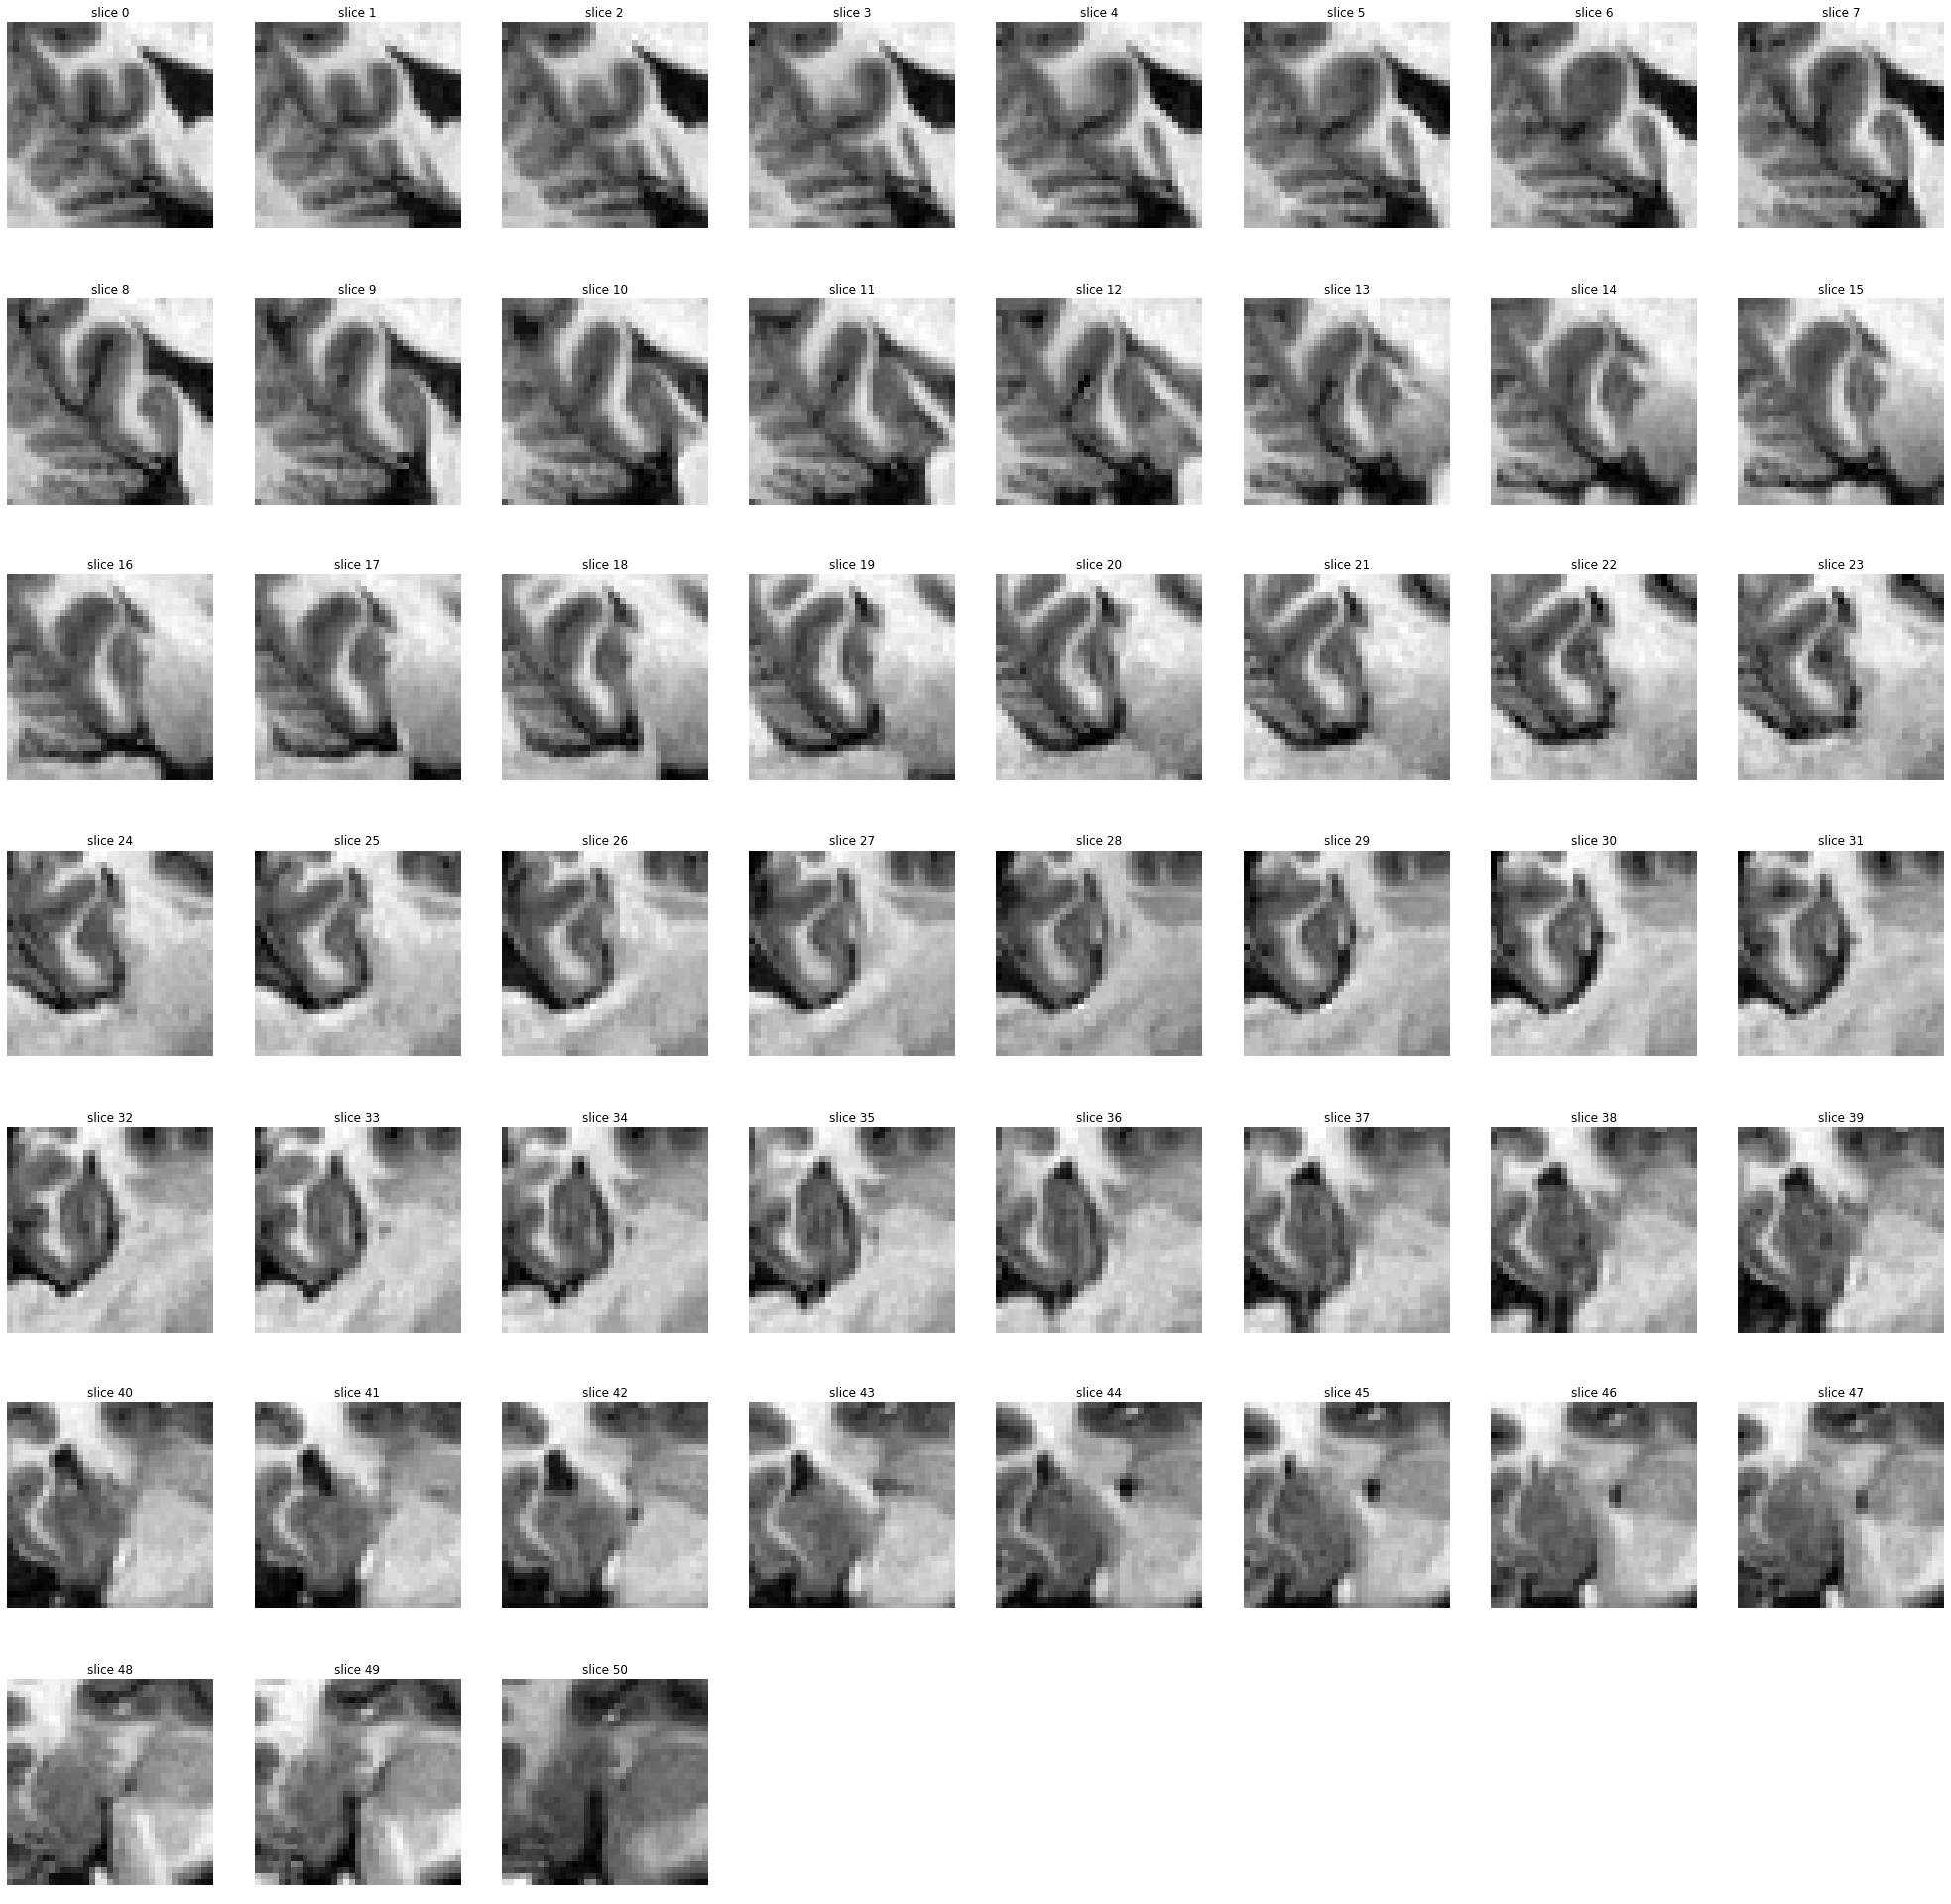

In [7]:
display_volume_slices(np.transpose(image, (1,0,2)), 8,7)

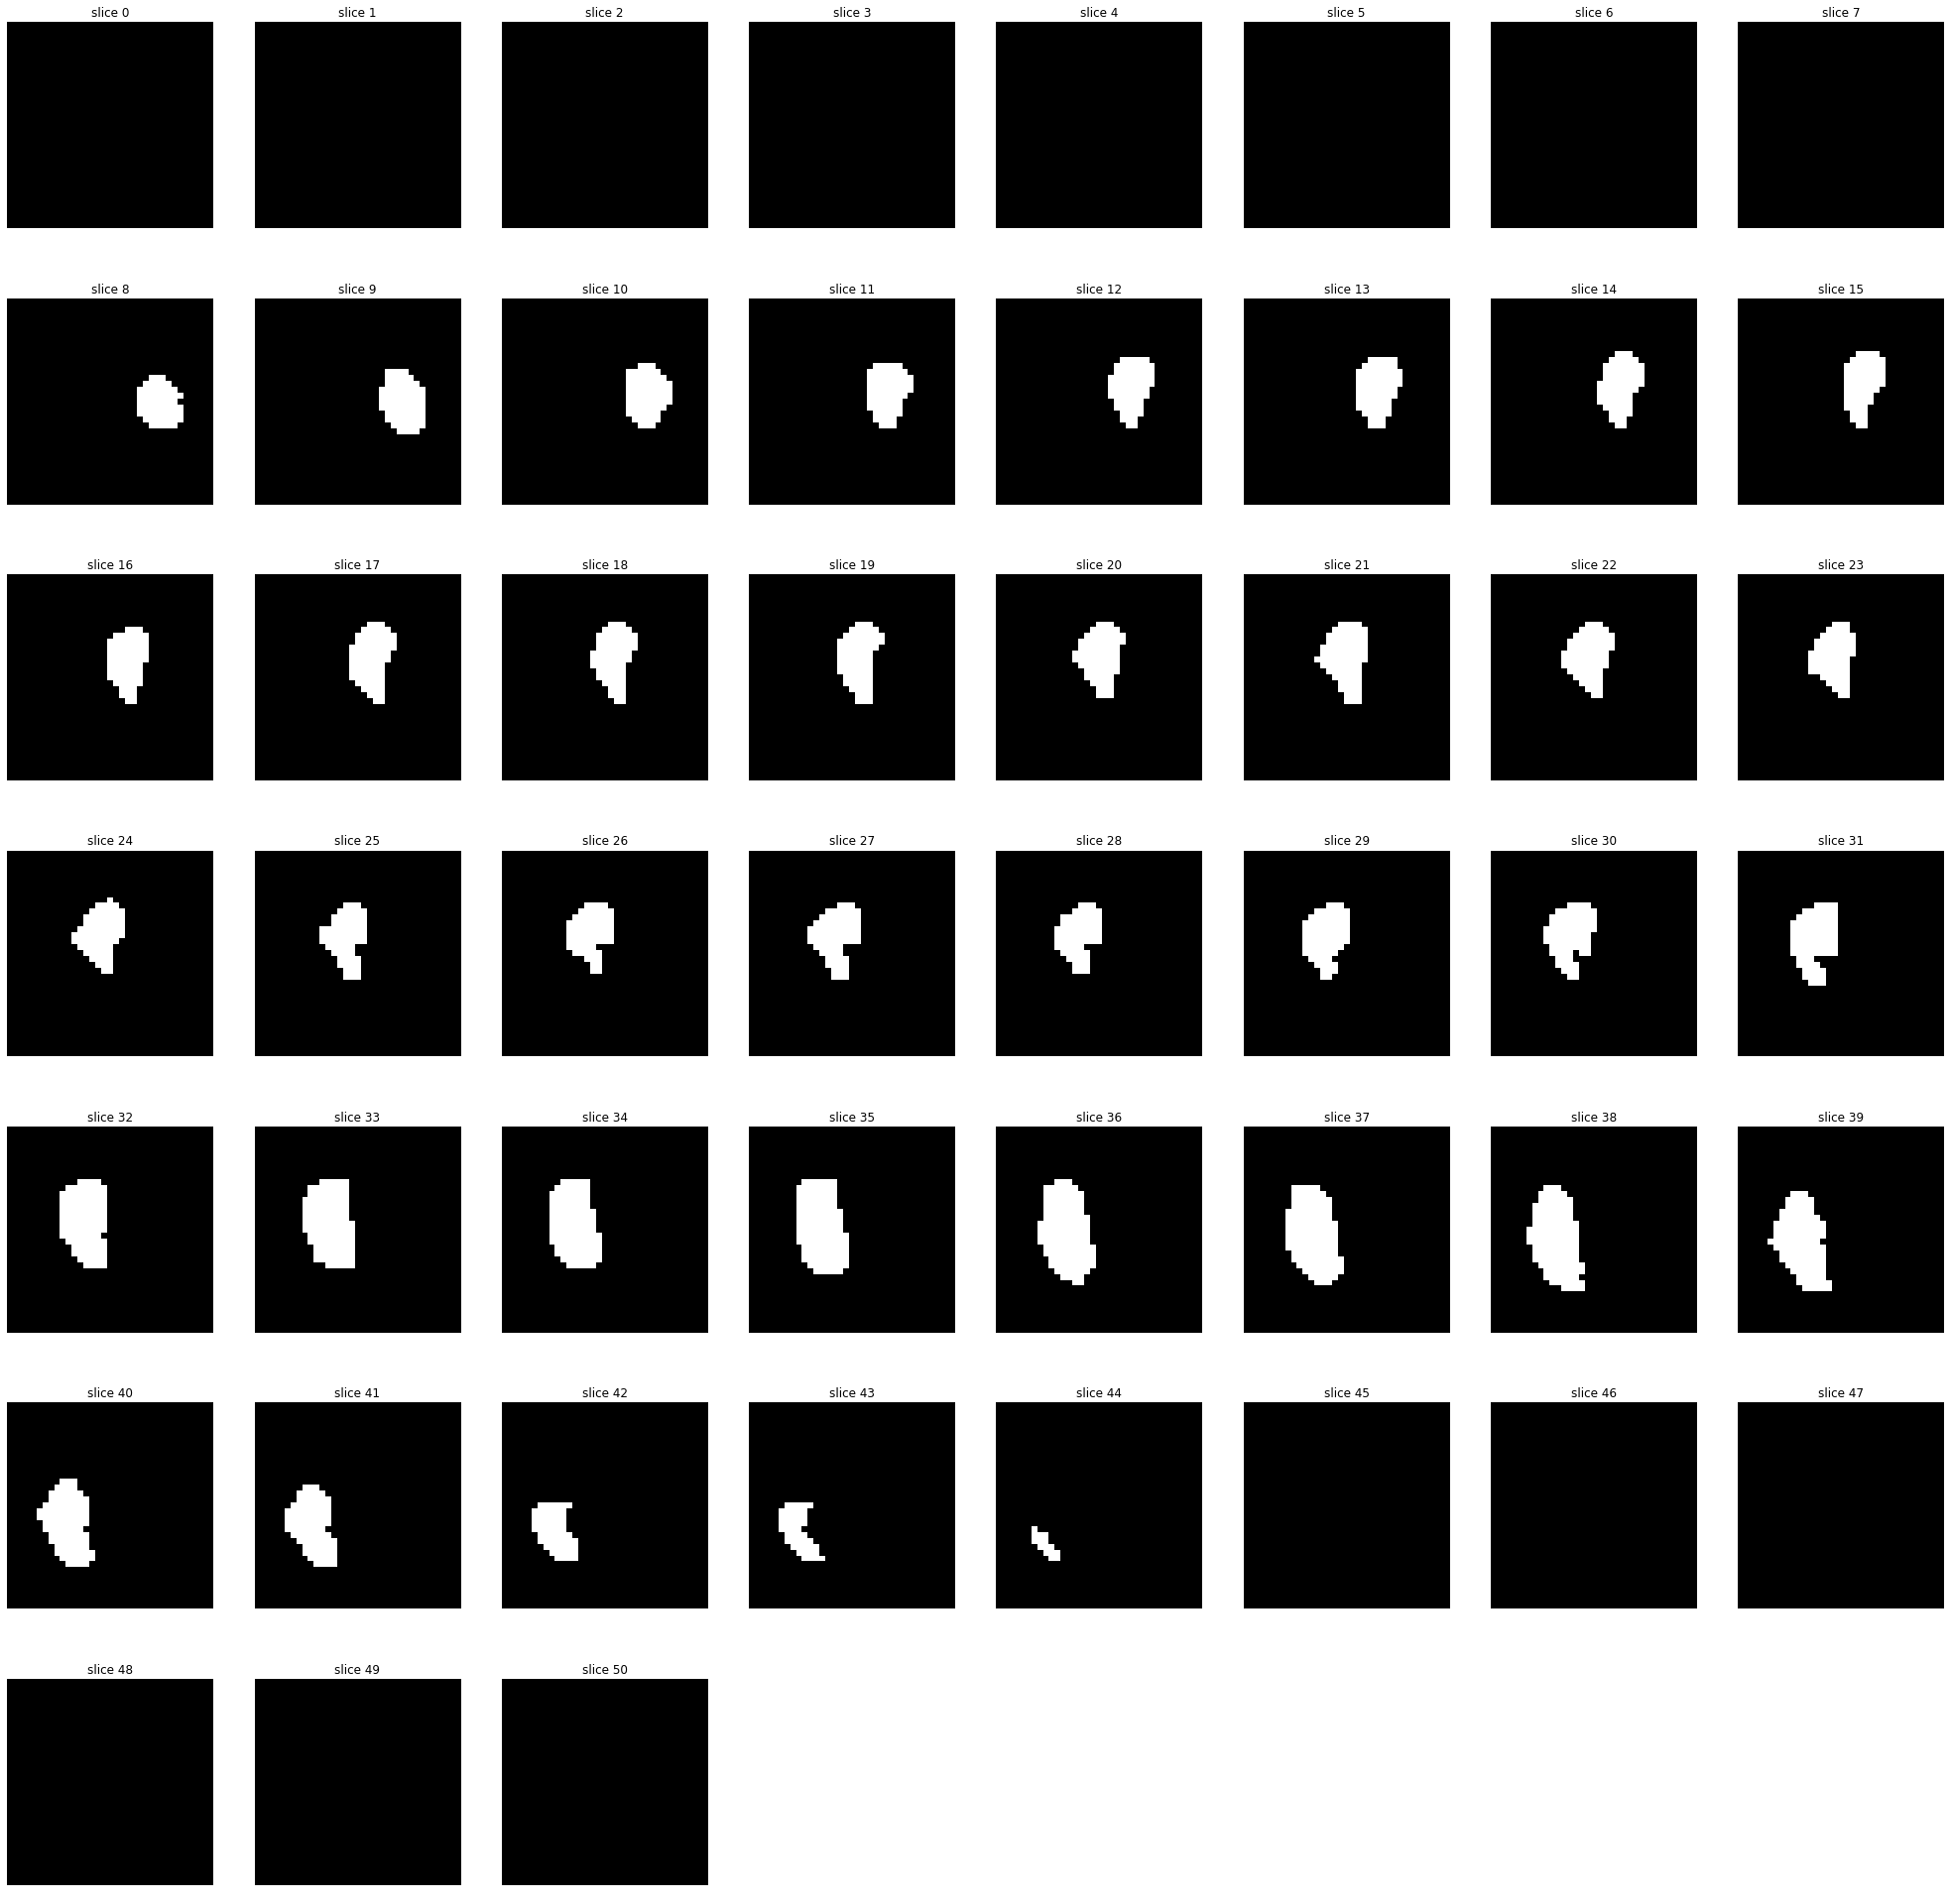

In [8]:
display_volume_slices(np.transpose(label, (1,0,2)), 8,7)

### 3D Slicer - Axial Plane

#### Image 001

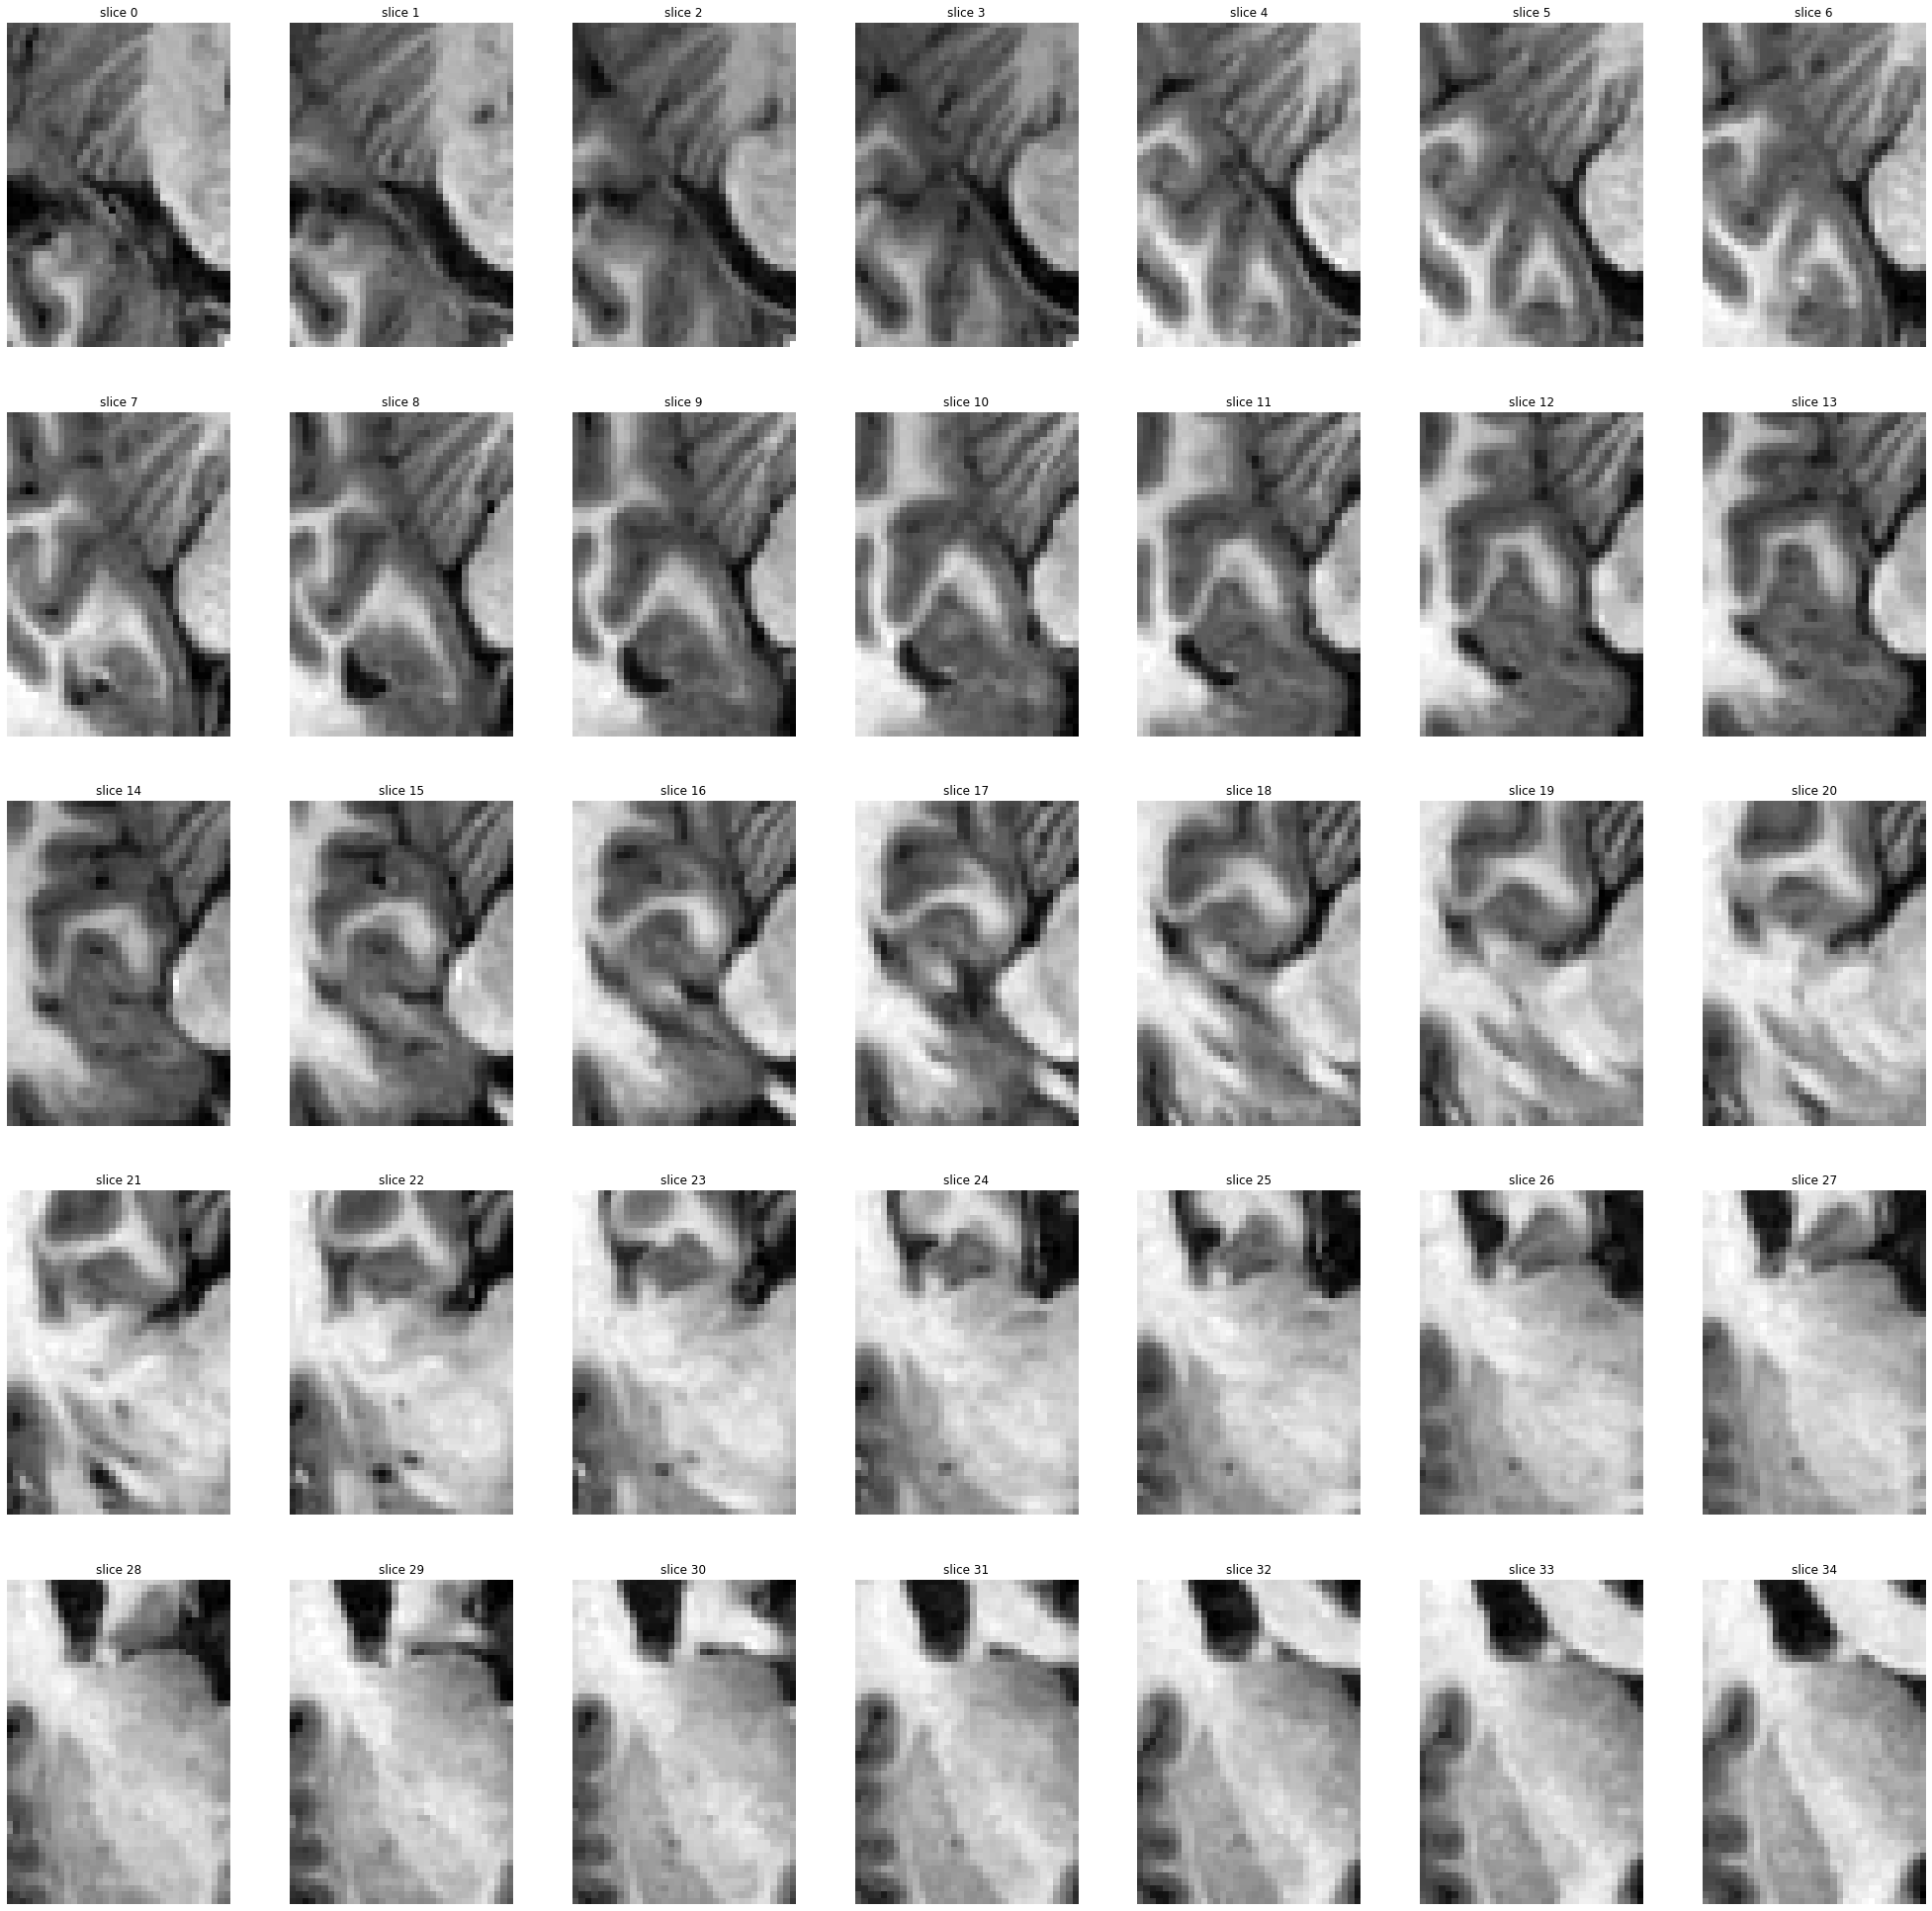

In [9]:
display_volume_slices(np.transpose(image, (2,1,0)),7,5)

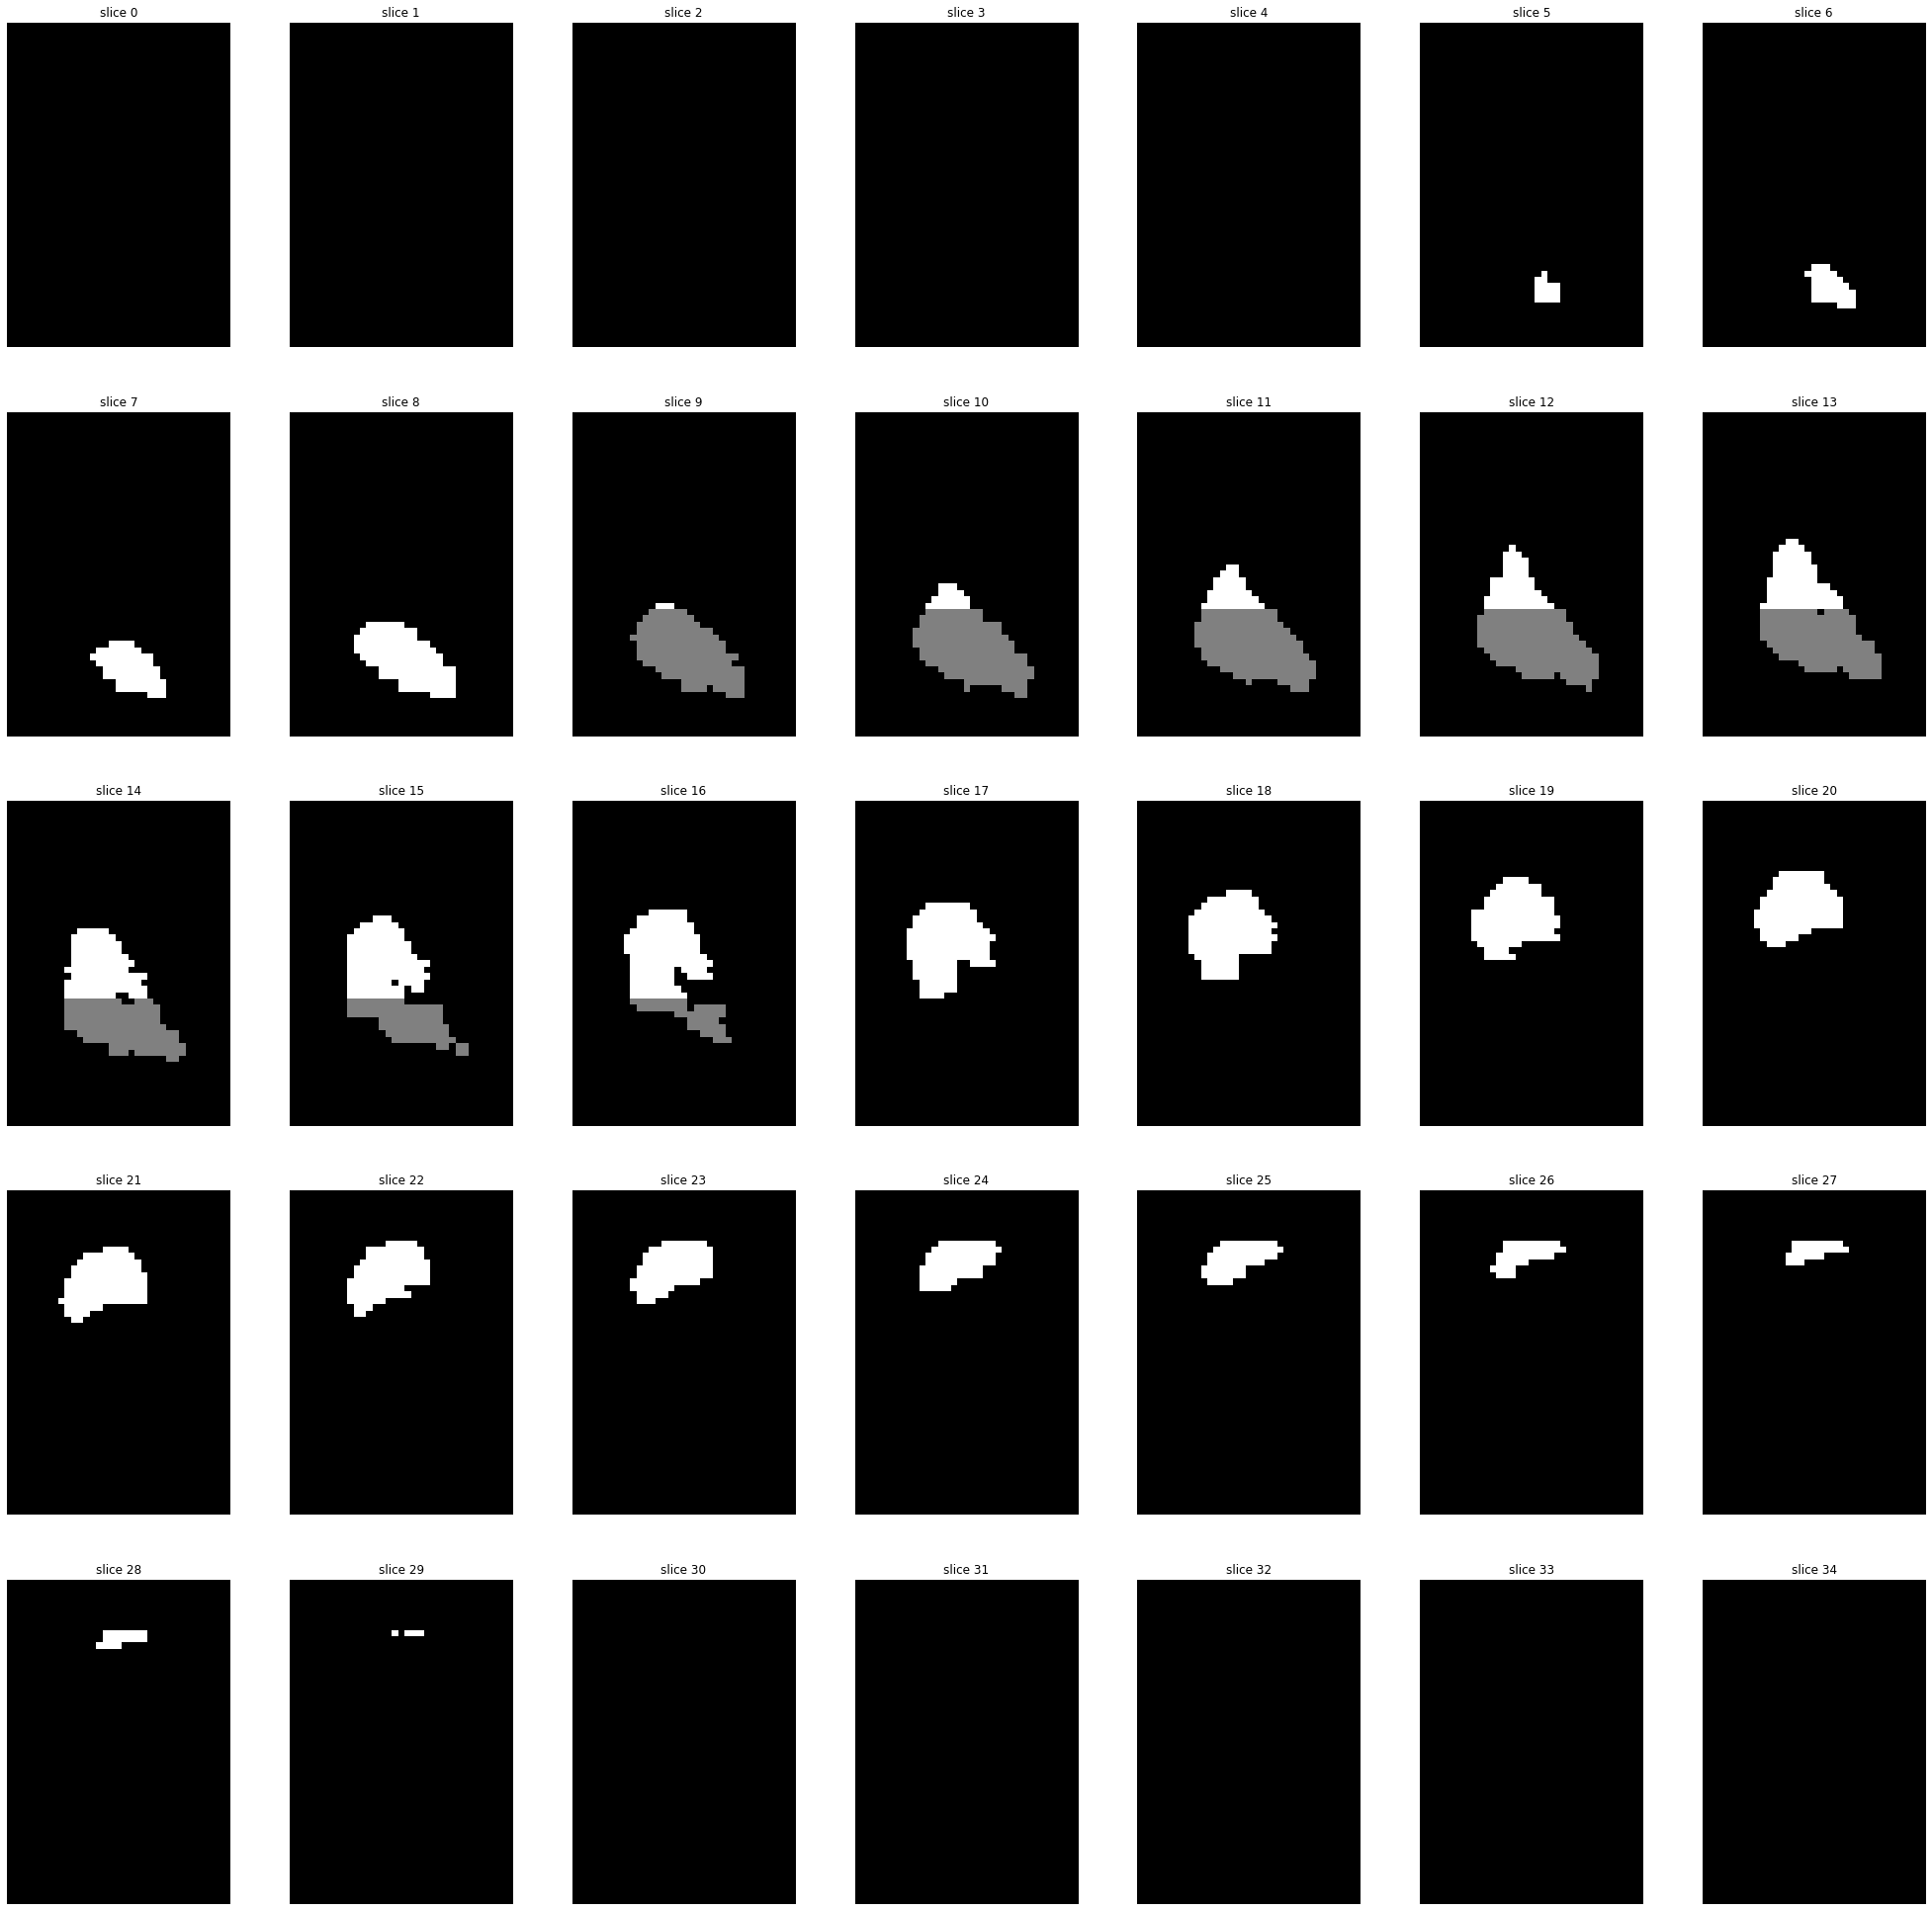

In [10]:
display_volume_slices(np.transpose(label, (2,1,0)),7,5)

#### Image 42 - Sagittal

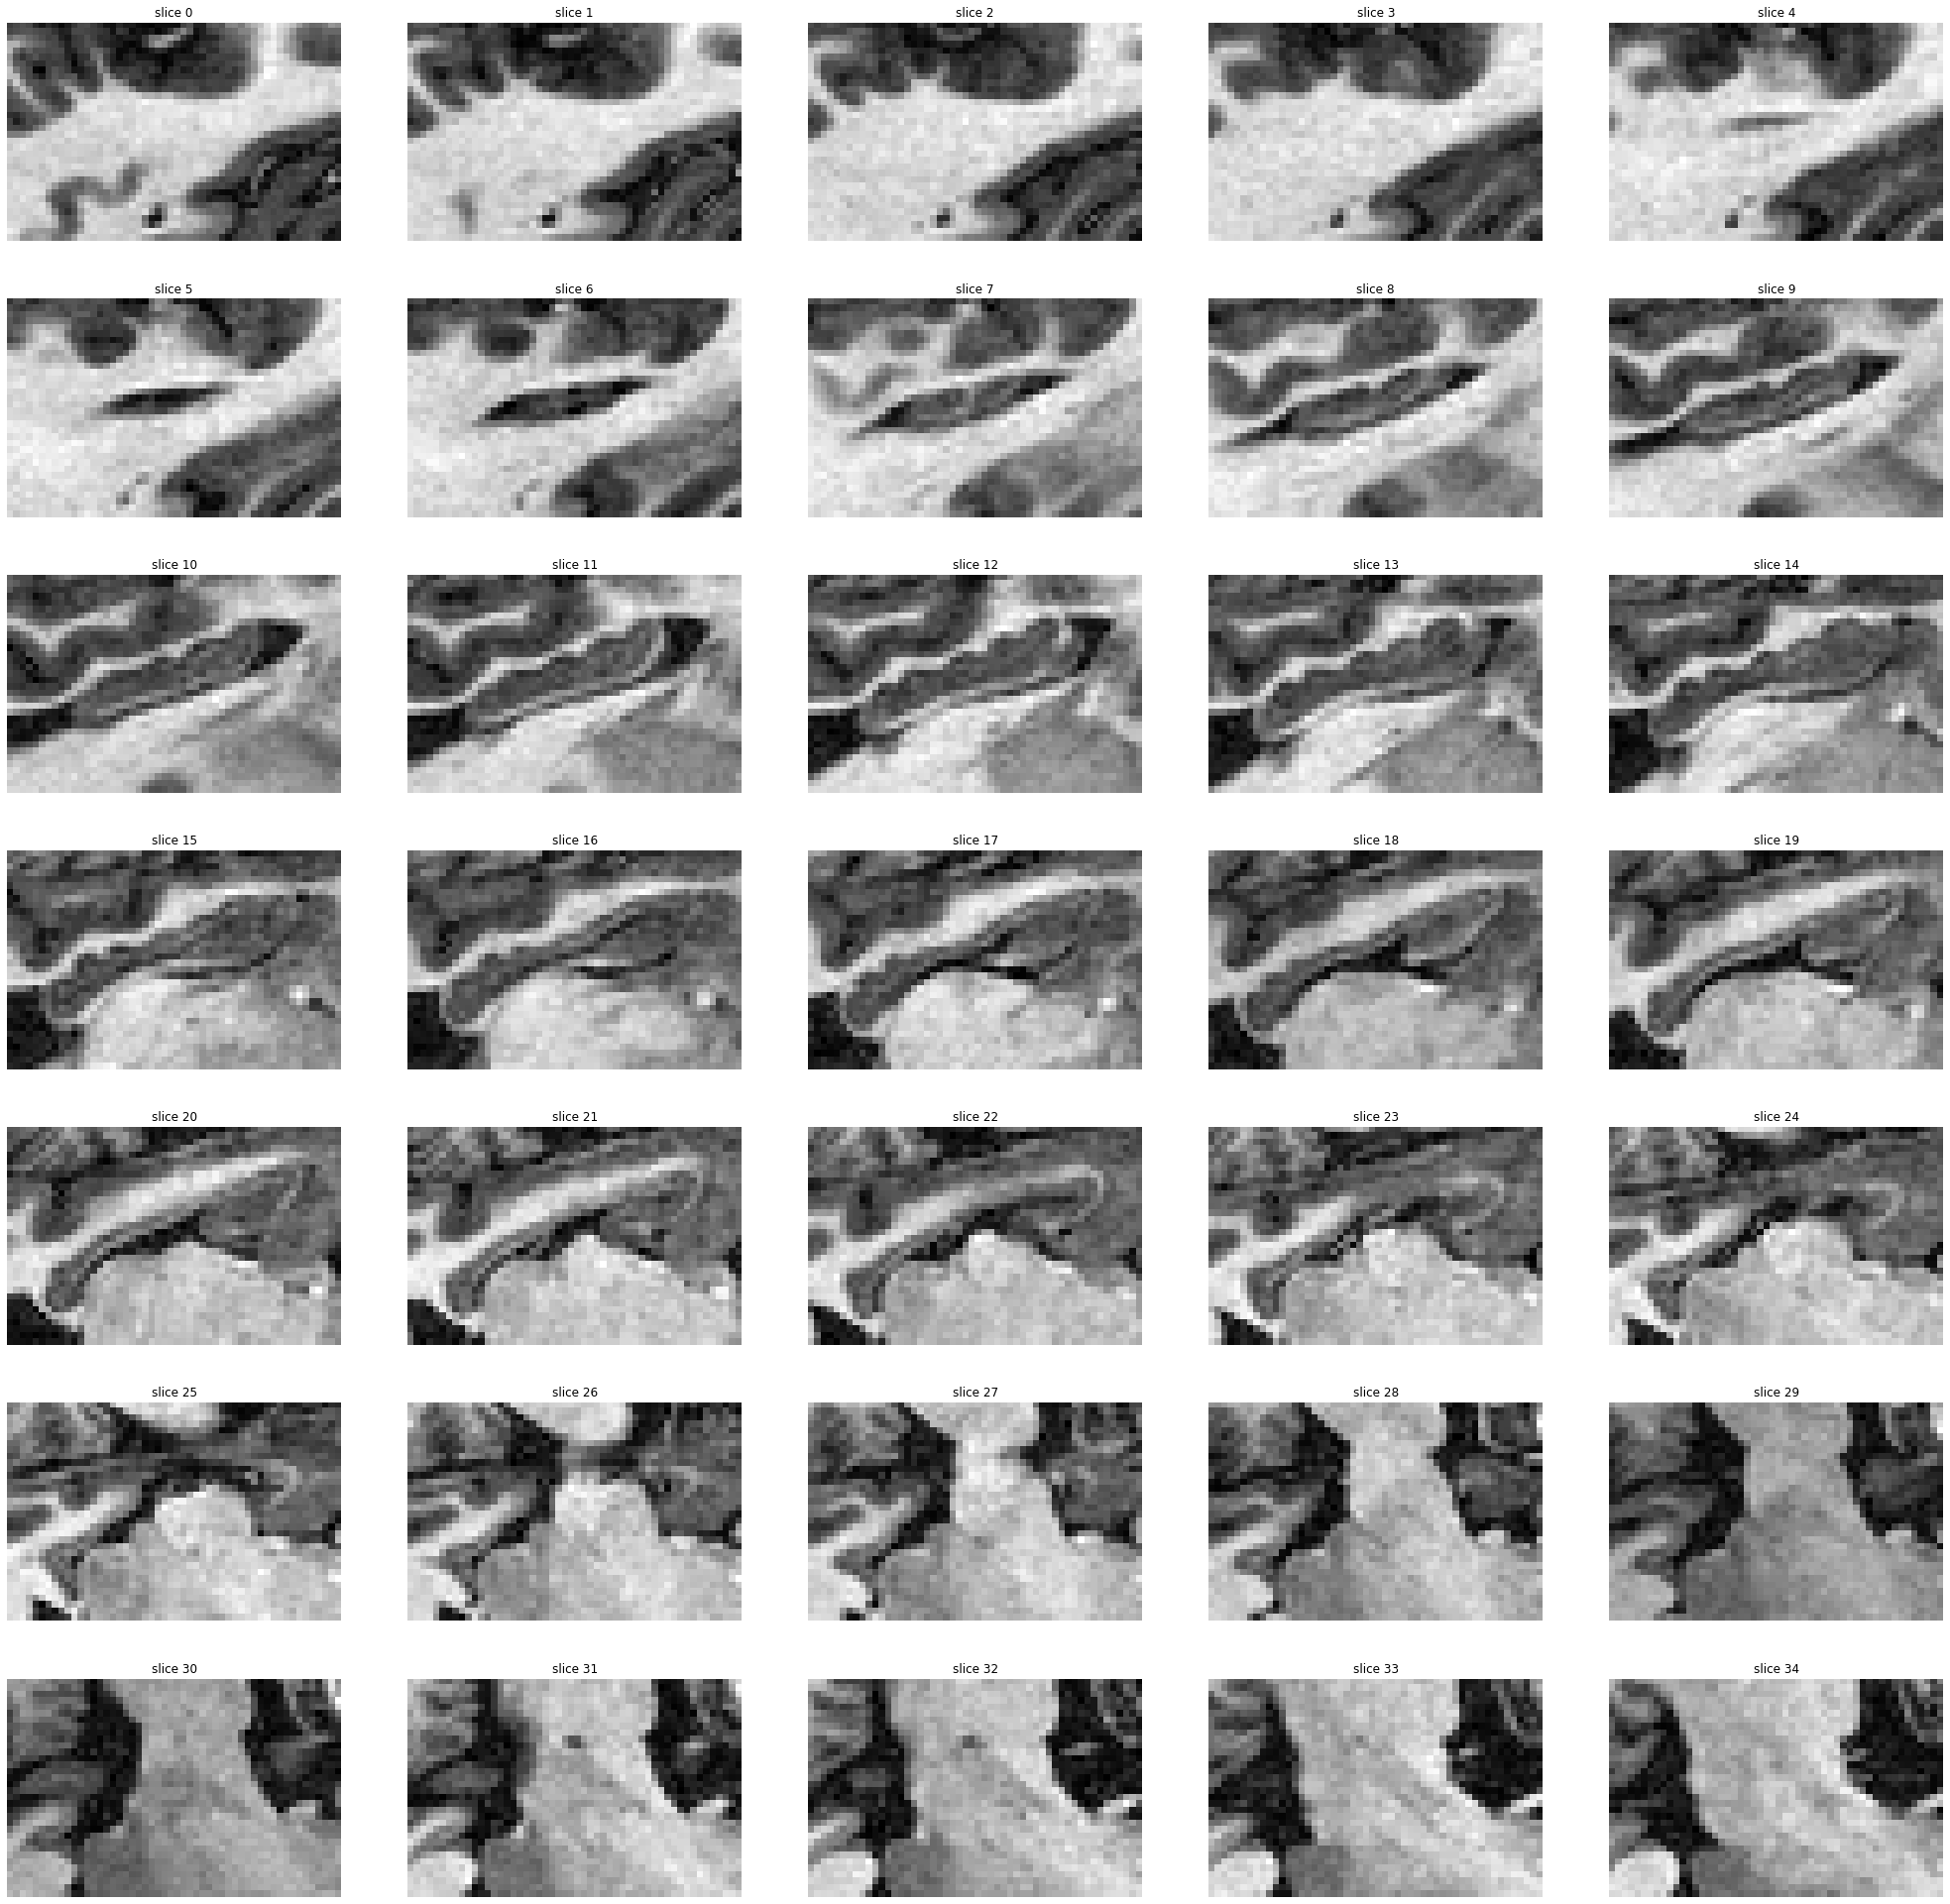

In [11]:
display_volume_slices(np.transpose(image_42,(0,2,1)), 5,7)

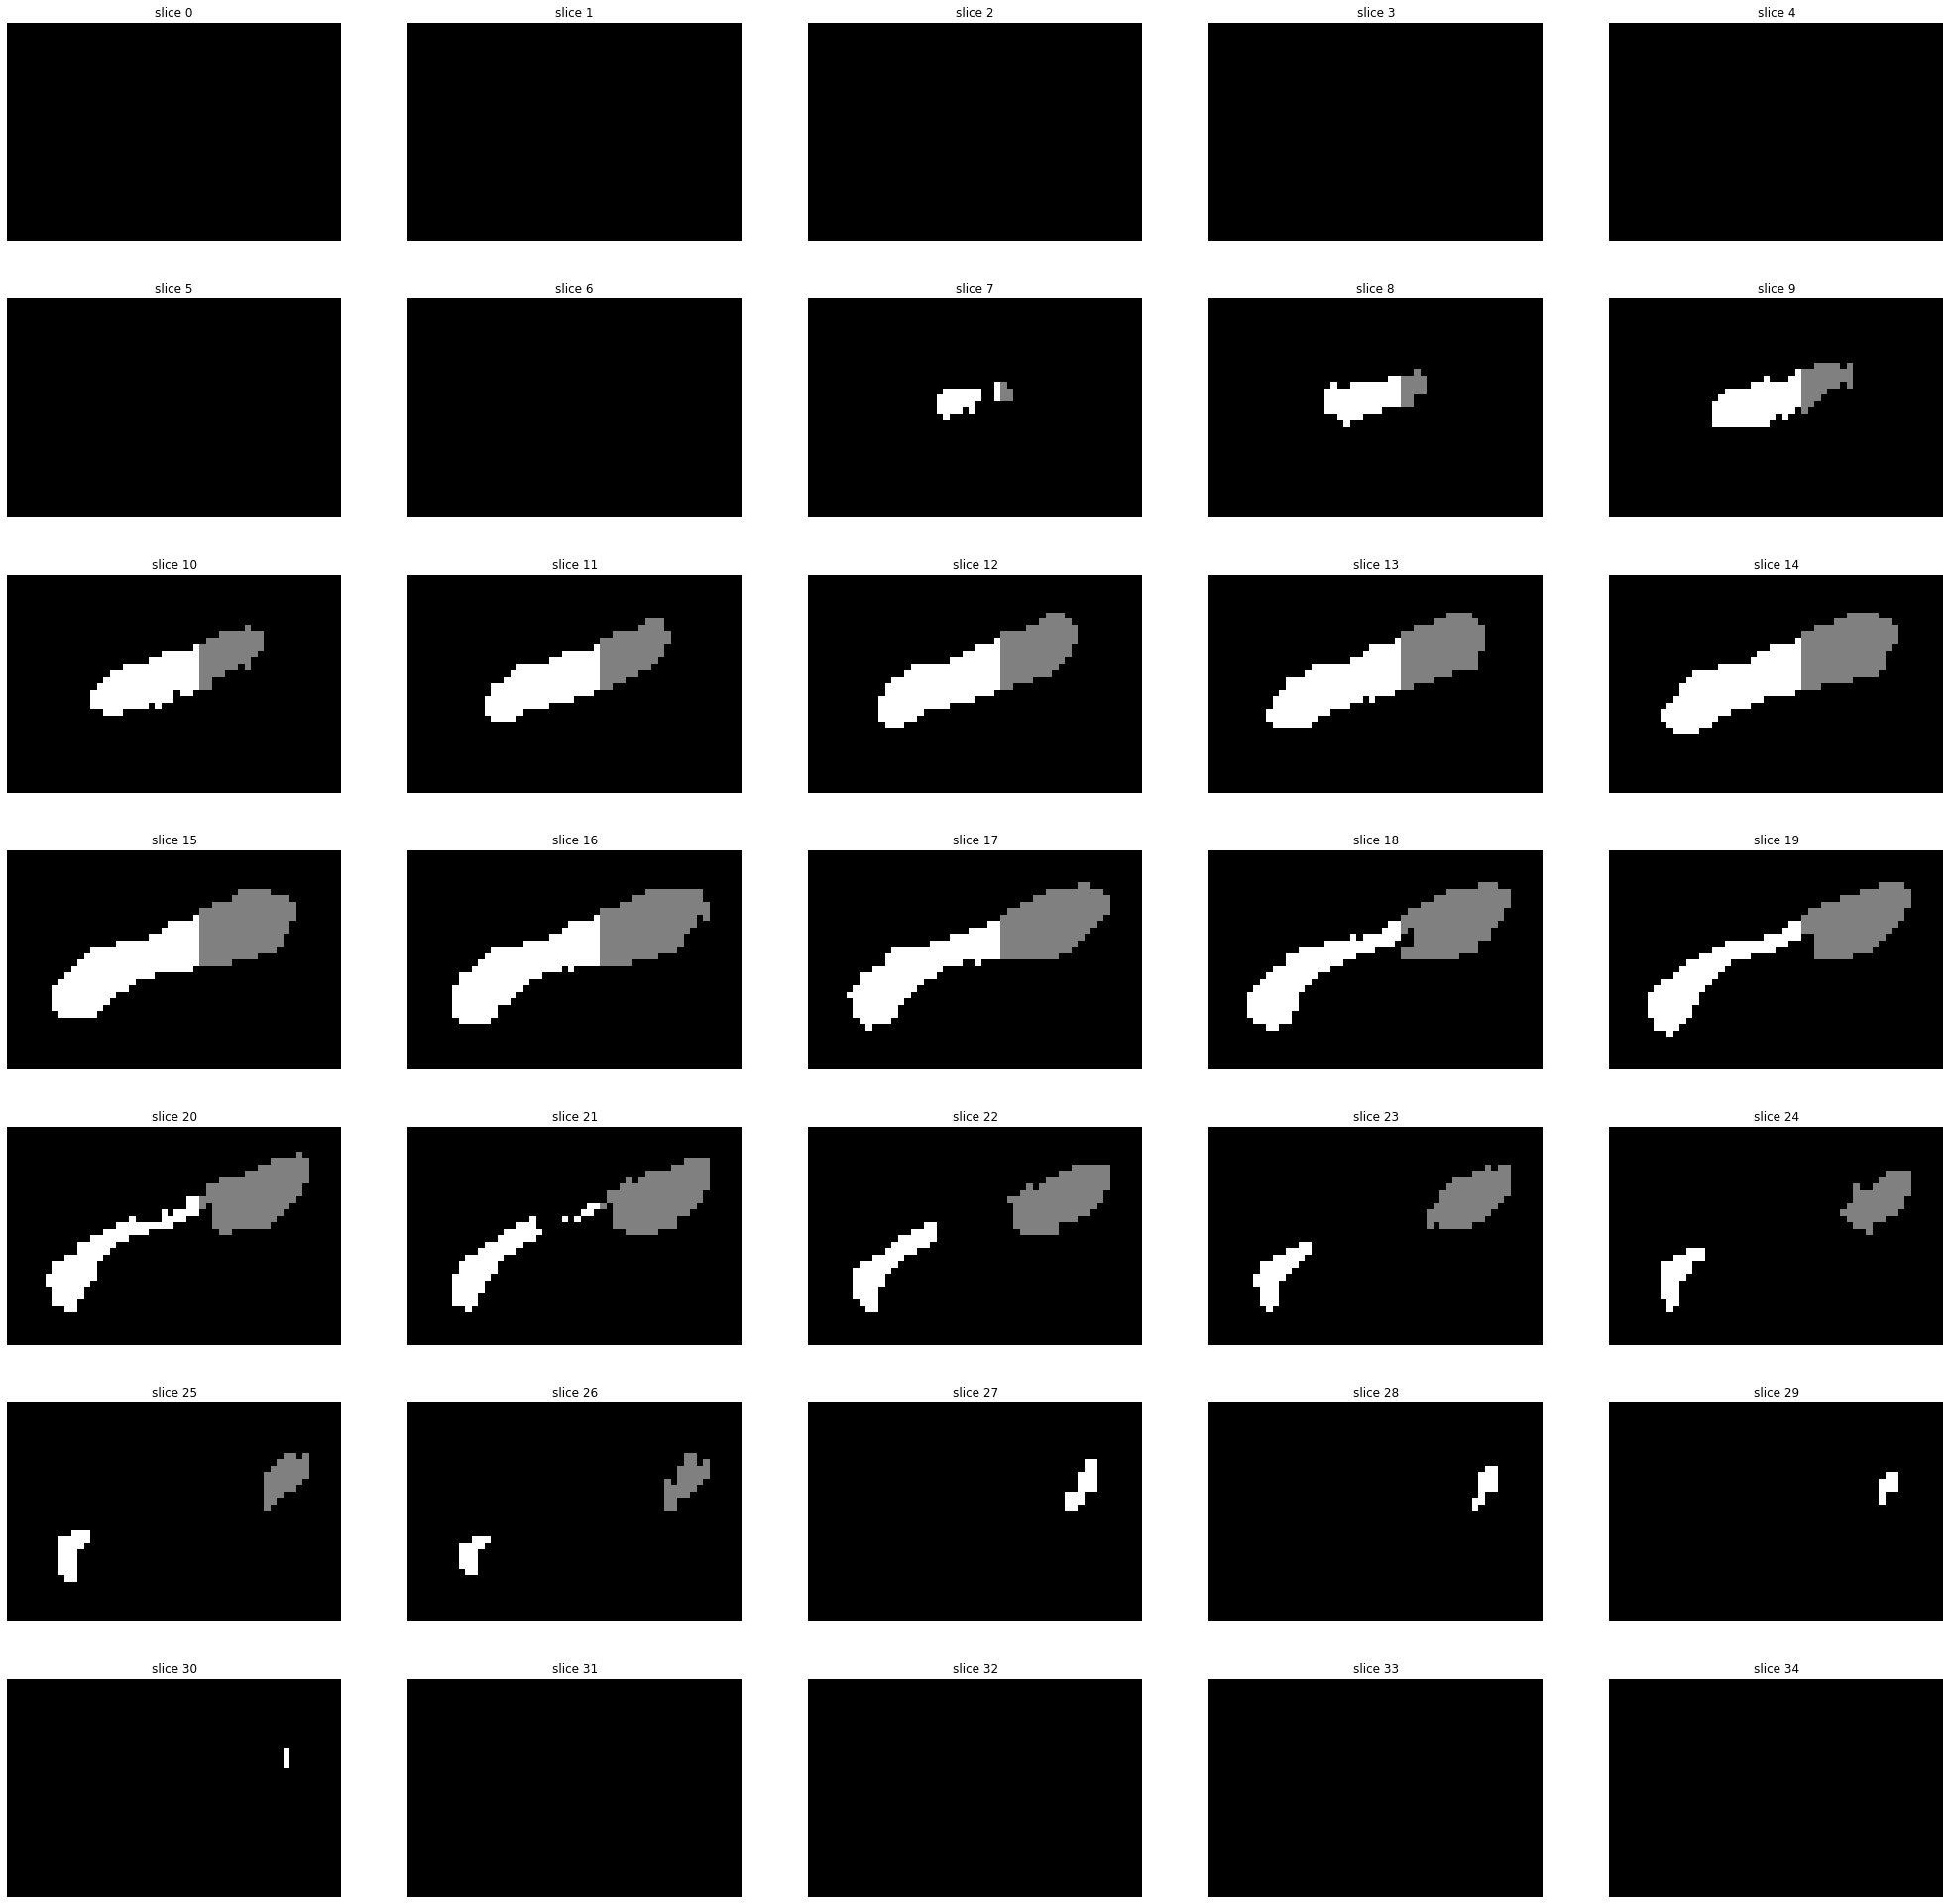

In [12]:
display_volume_slices(np.transpose(label_42,(0,2,1)), 5,7)

#### Image 42 - Coronal

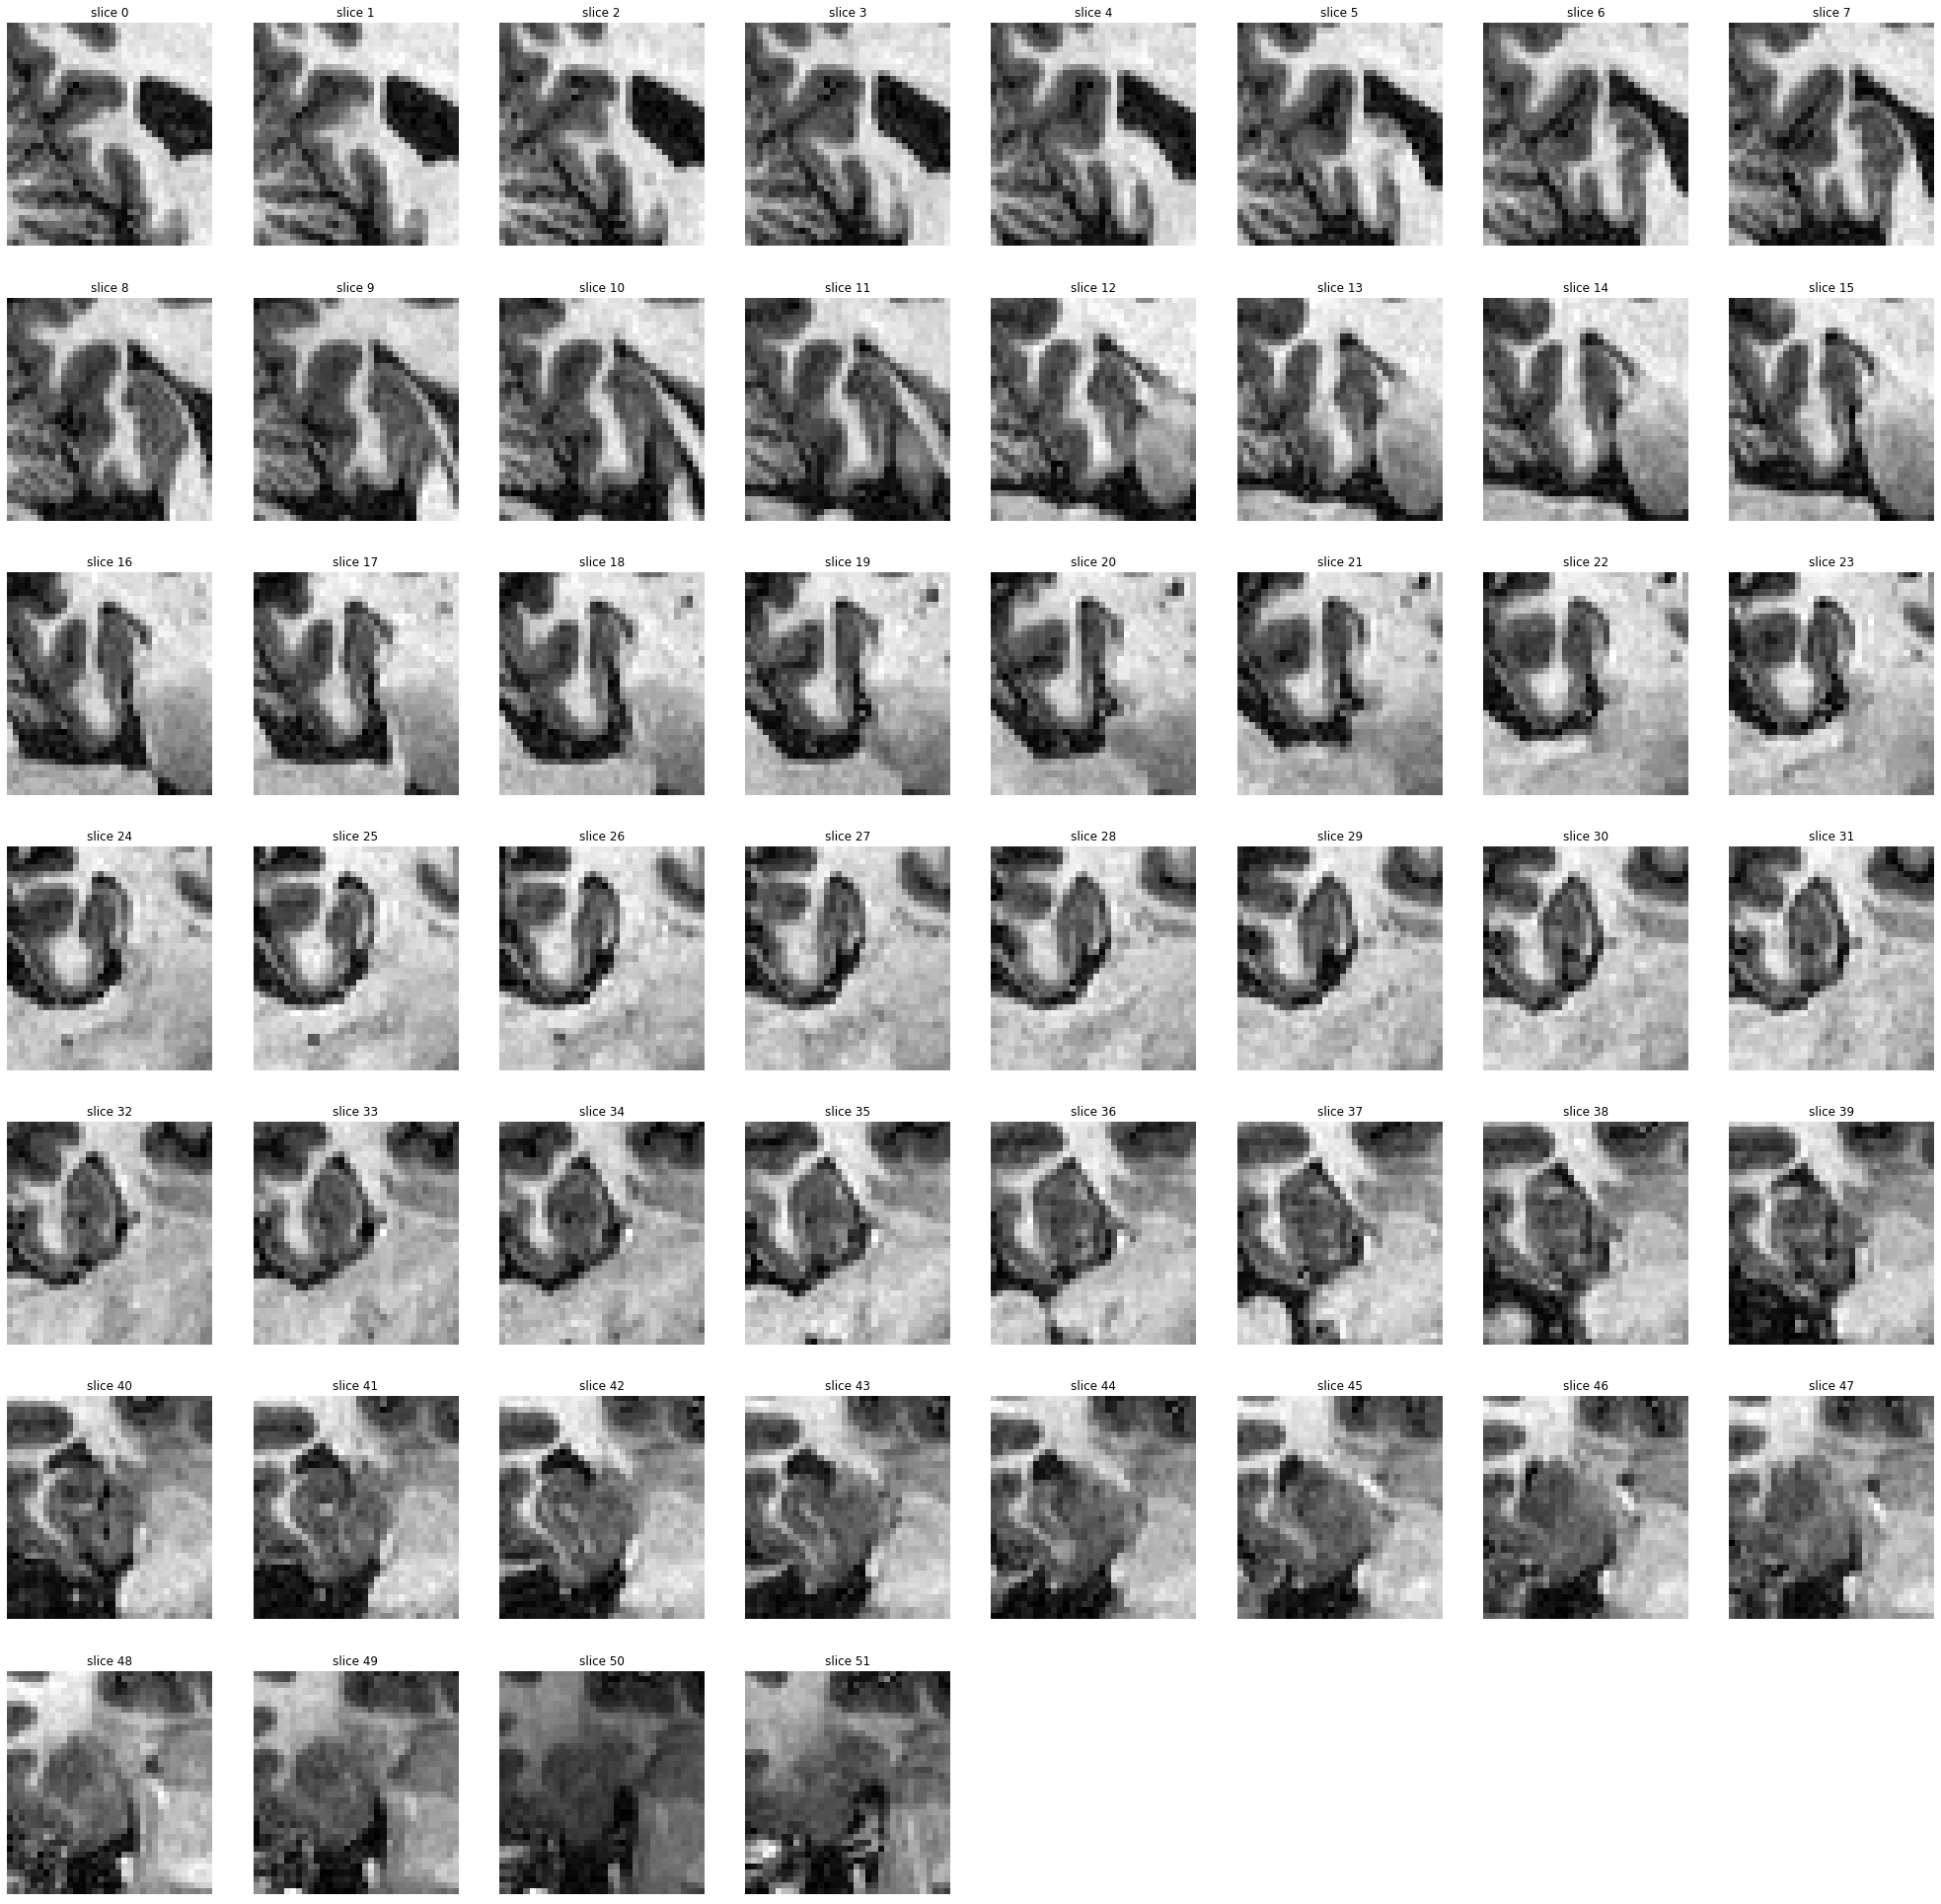

In [13]:
display_volume_slices(np.transpose(image_42, (1,0,2)), 8,7)

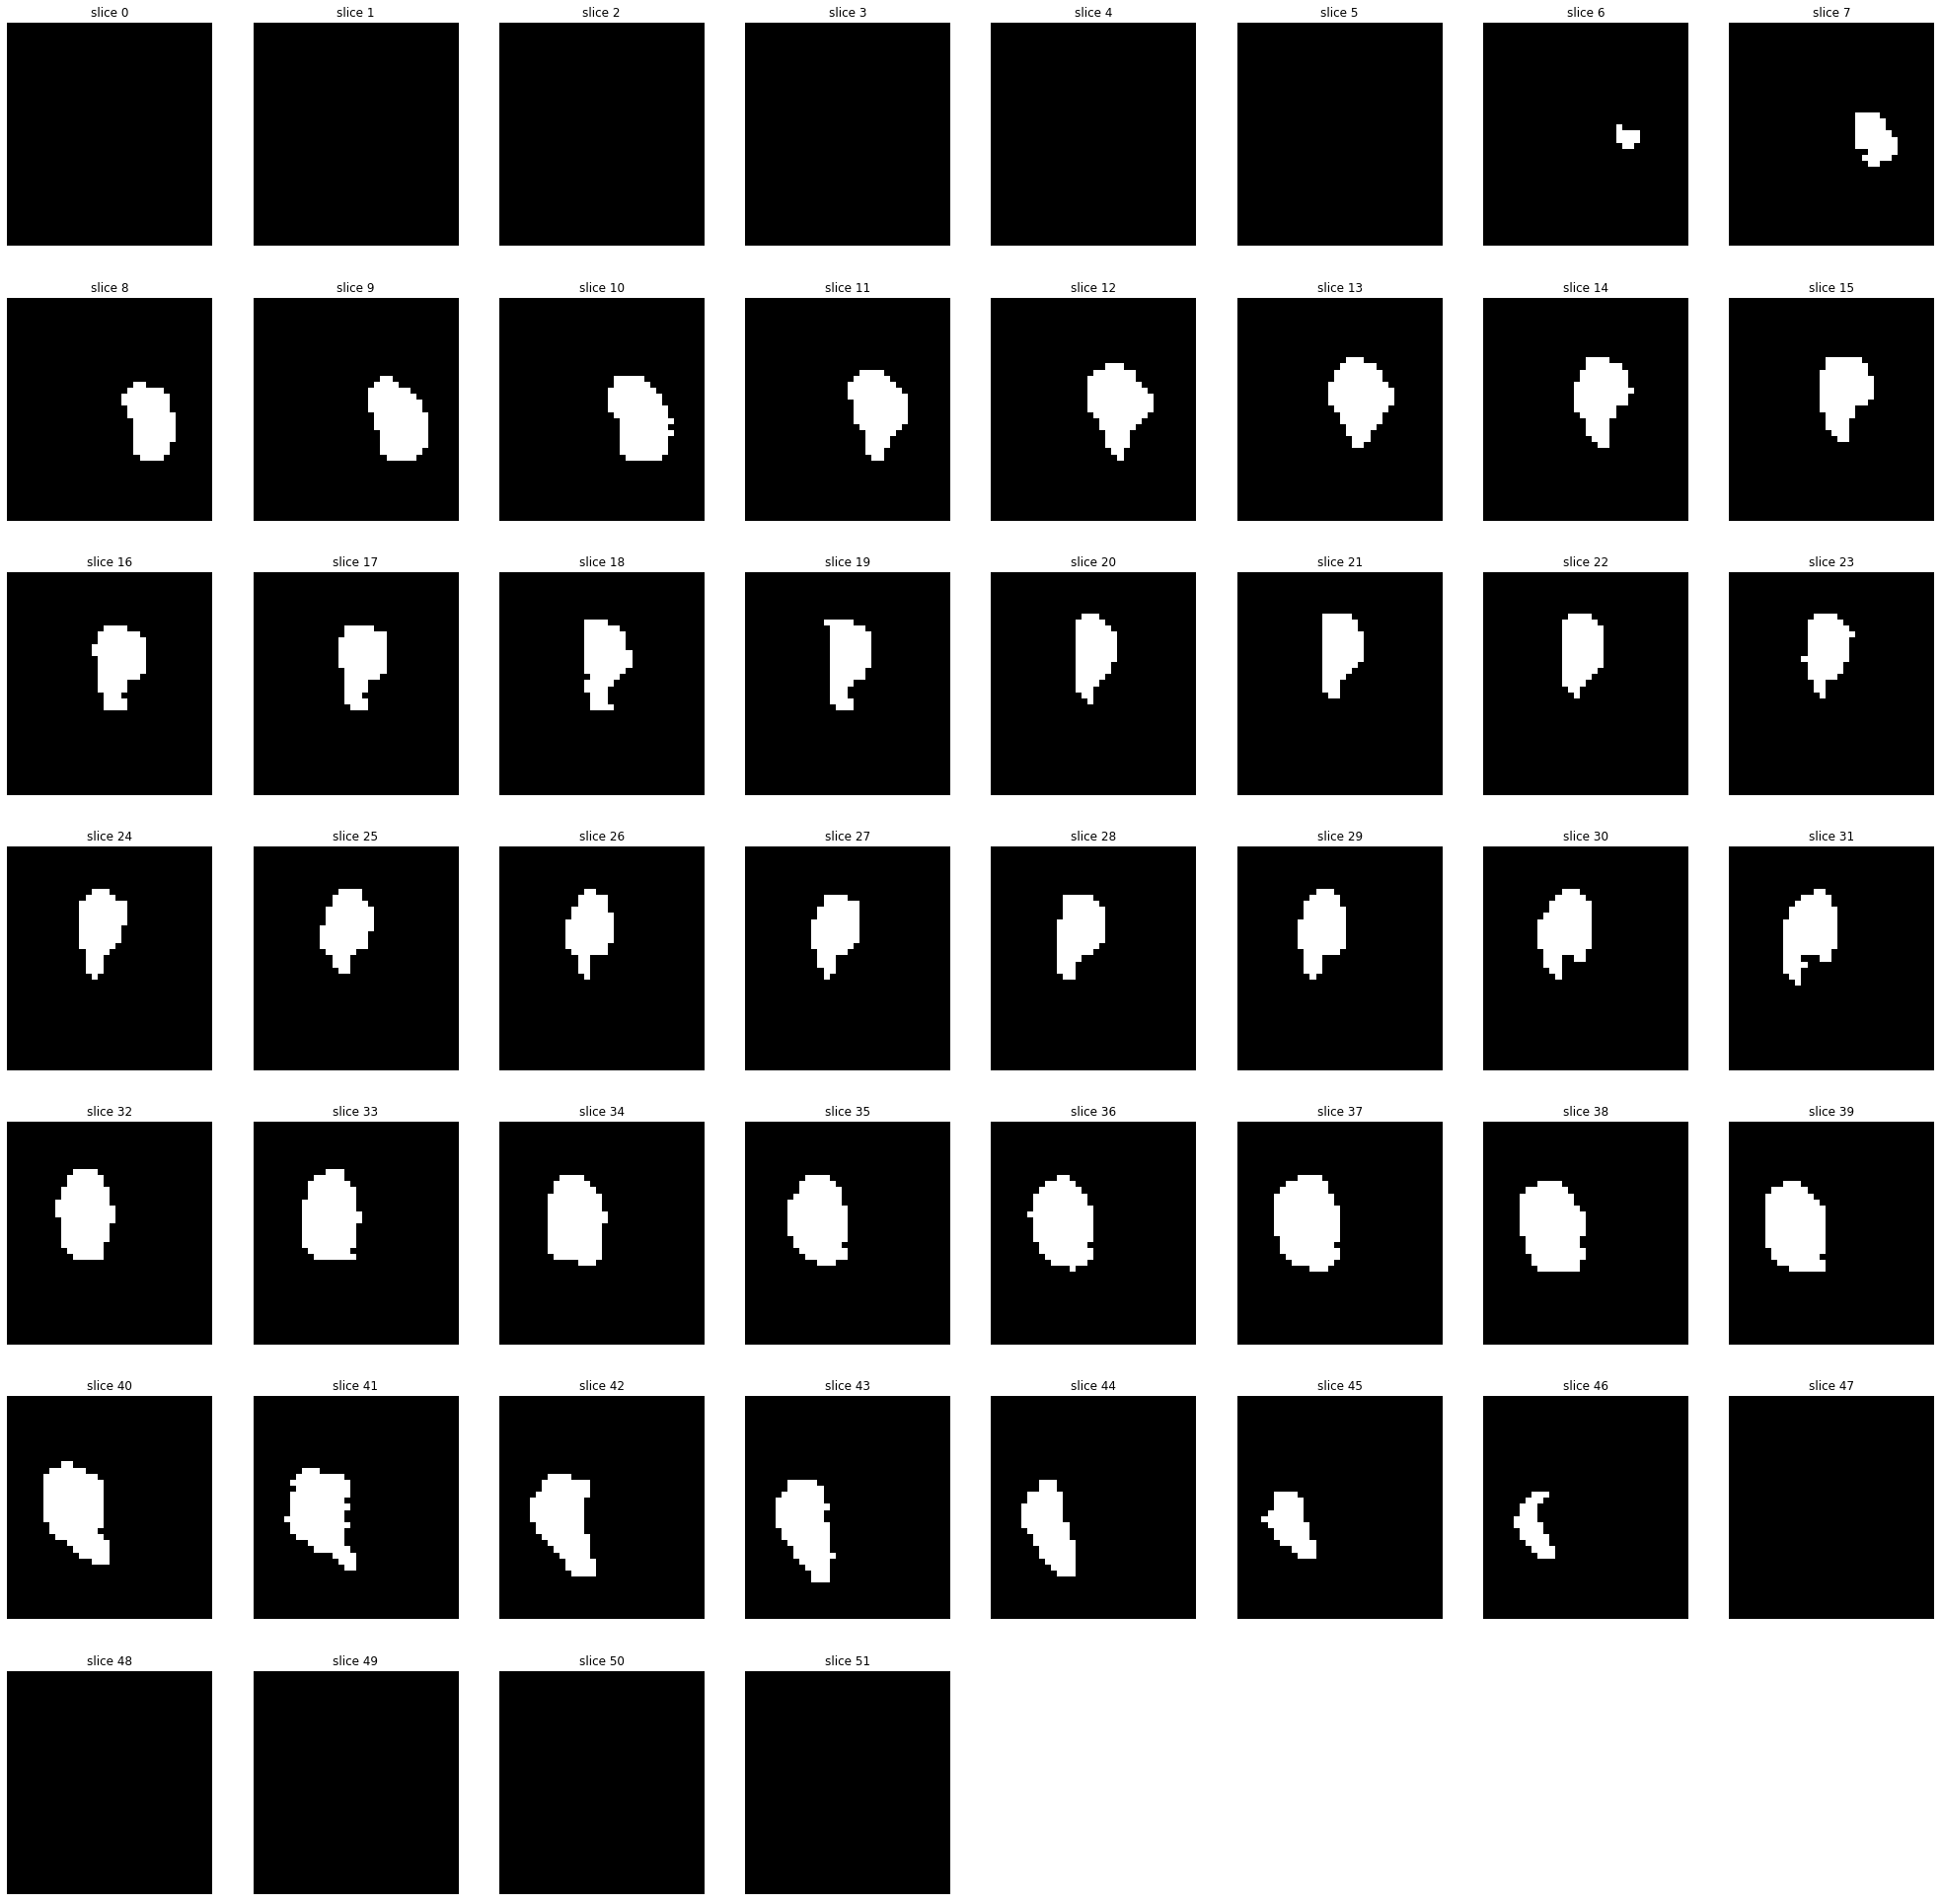

In [14]:
display_volume_slices(np.transpose(label_42, (1,0,2)), 8,7)

#### Image 42 - Axial

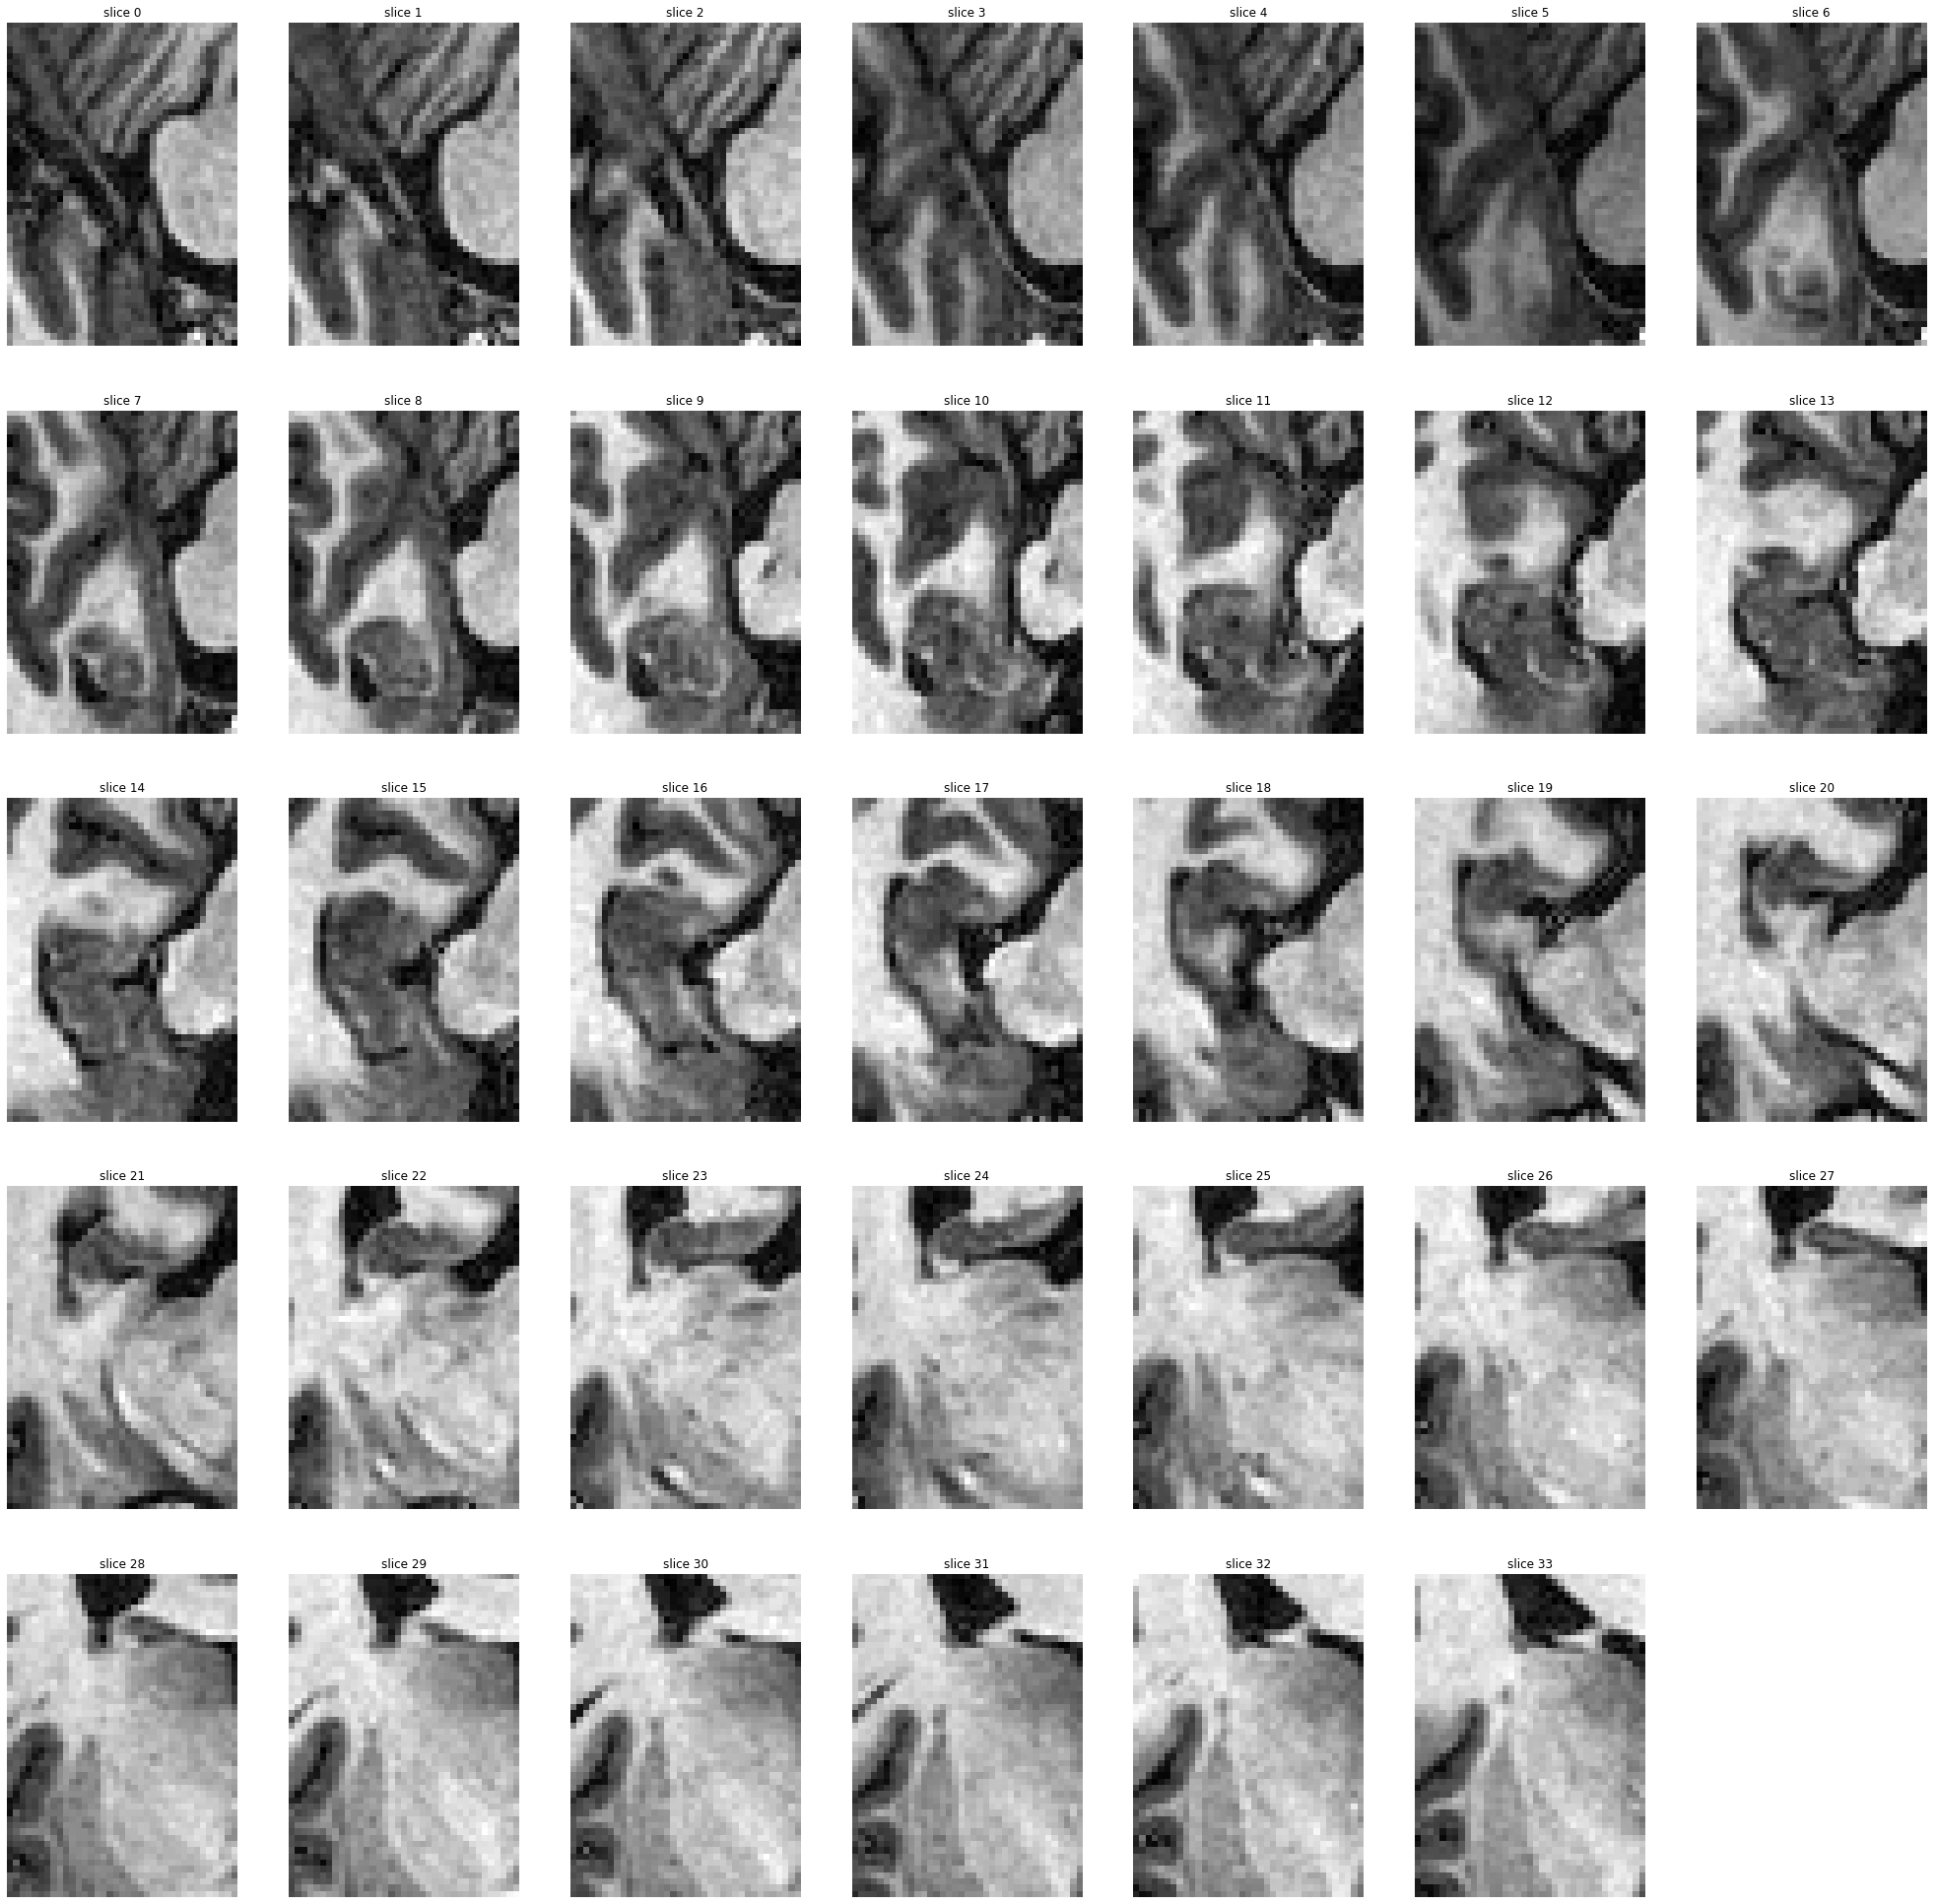

In [15]:
display_volume_slices(np.transpose(image_42, (2,1,0)),7,5)

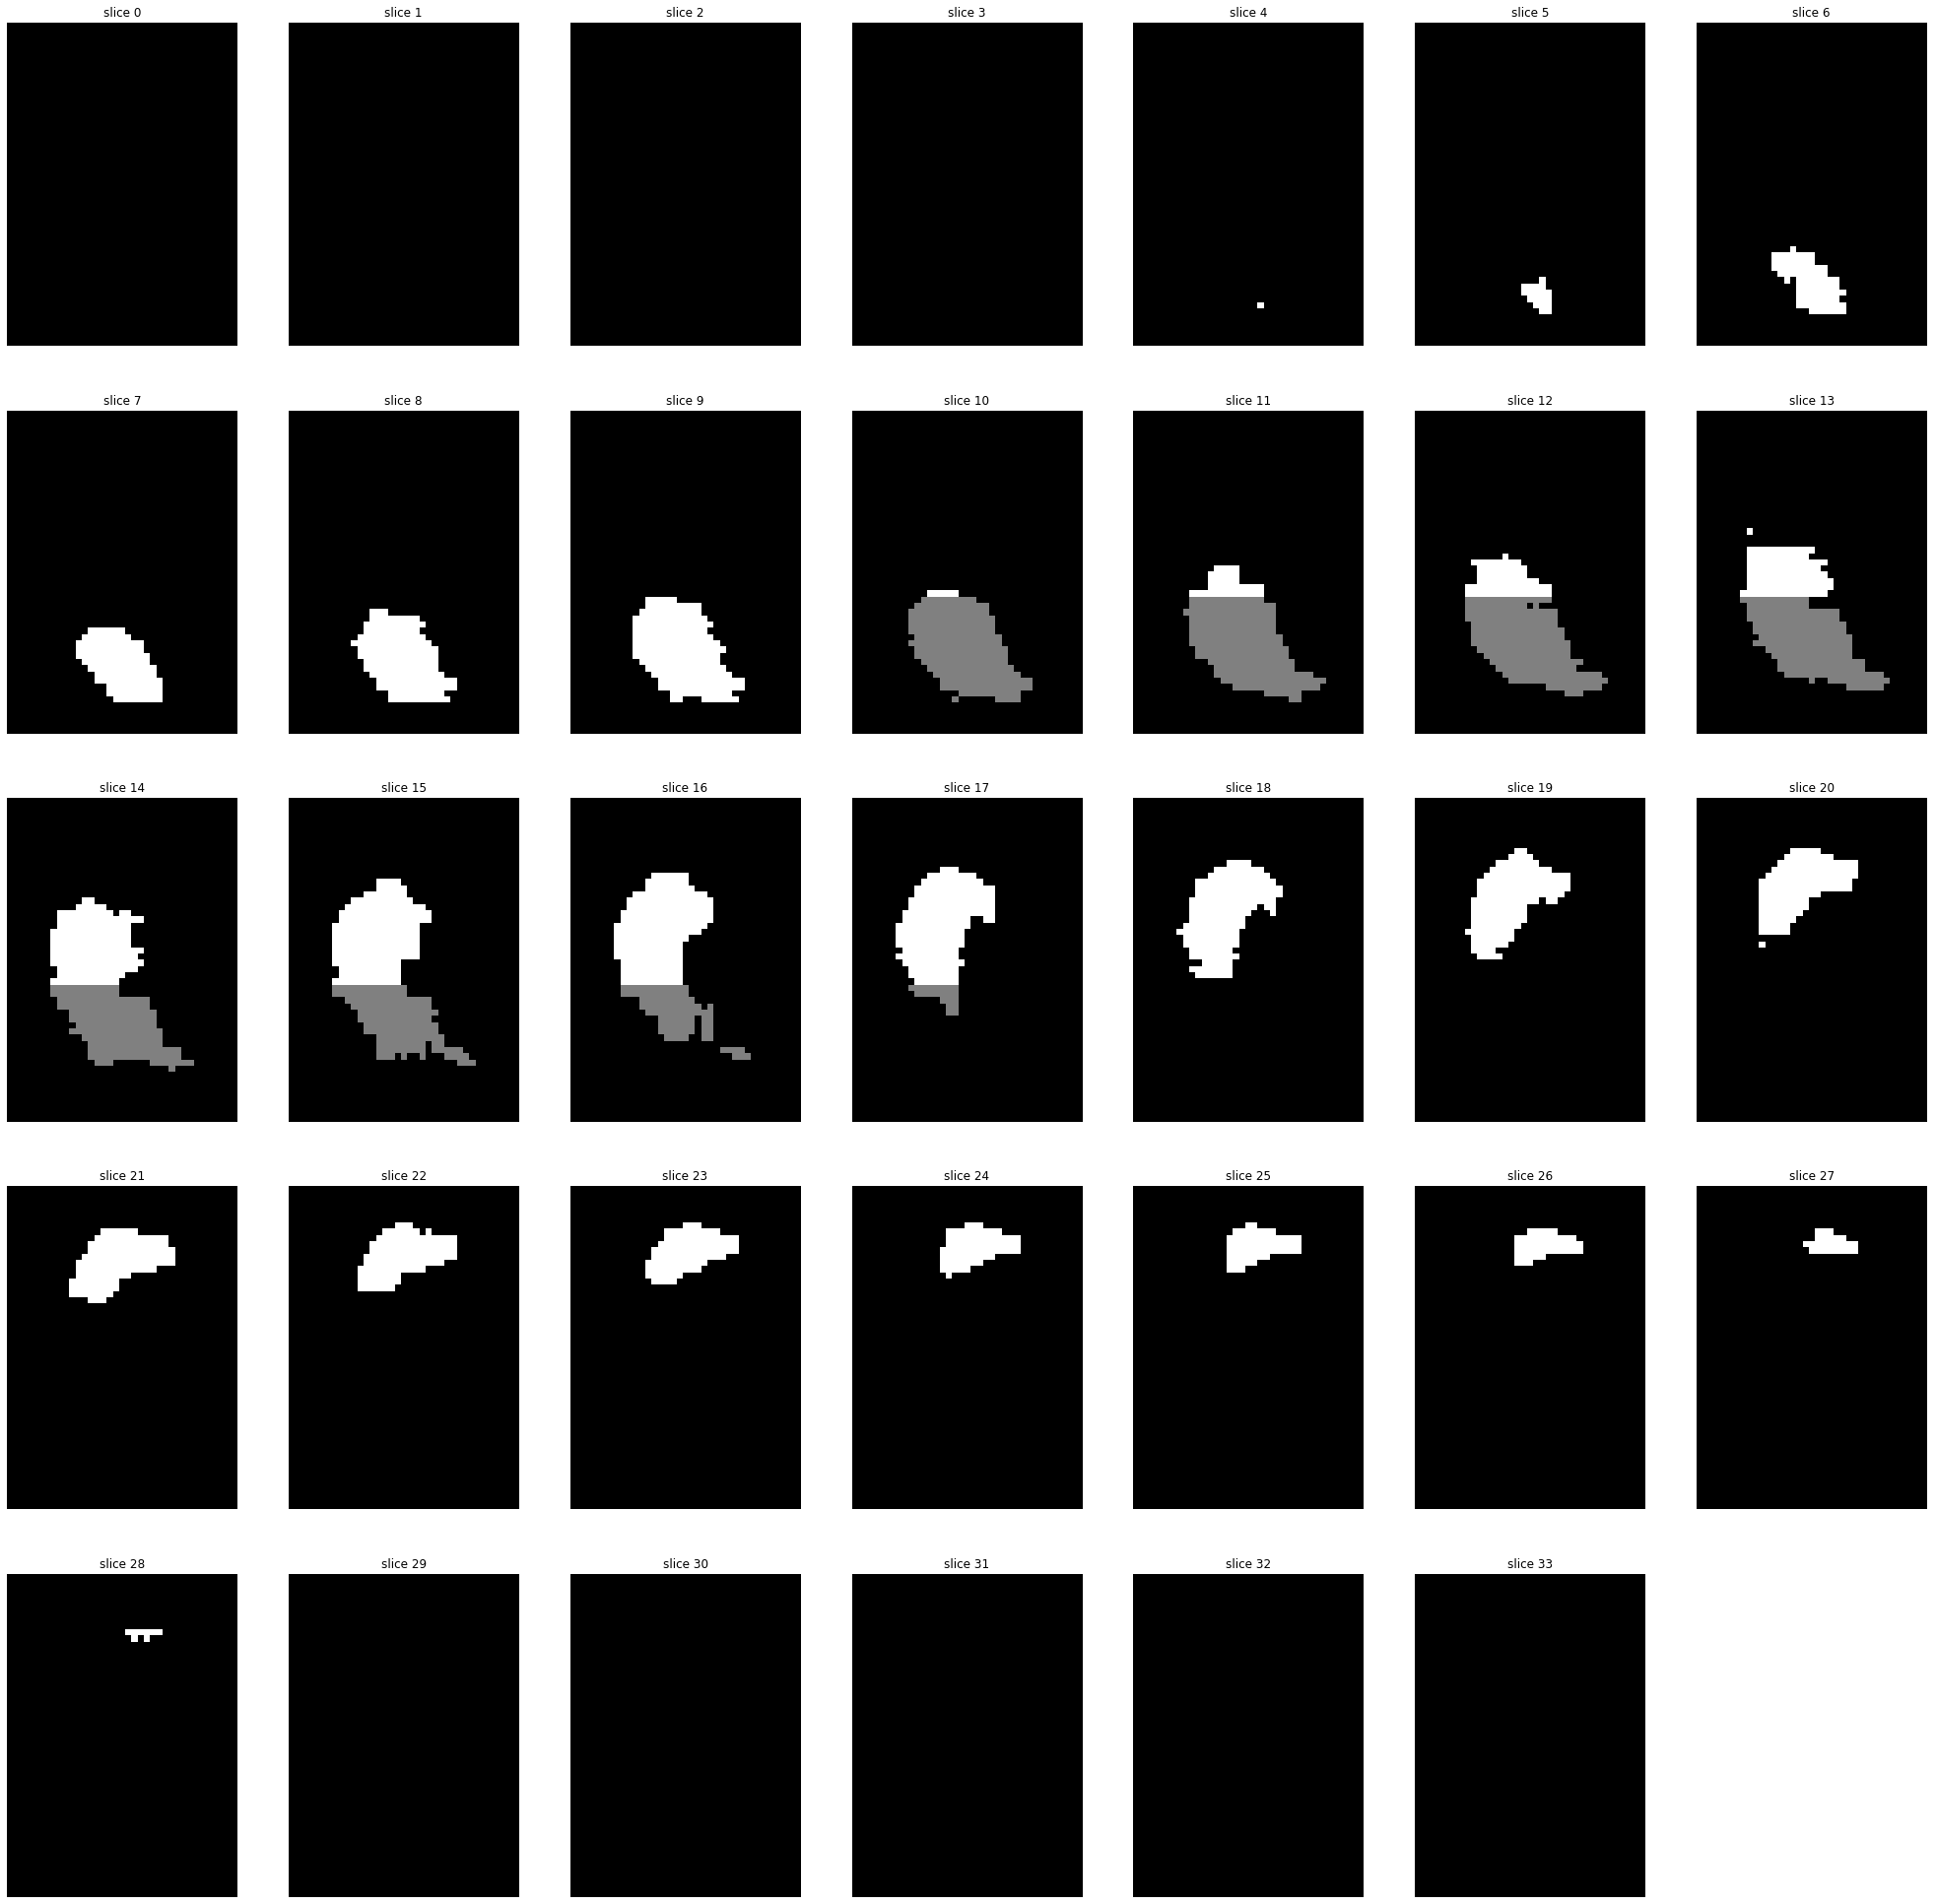

In [16]:
display_volume_slices(np.transpose(label_42, (2,1,0)),7,5)

#### Image 251 Sagittal

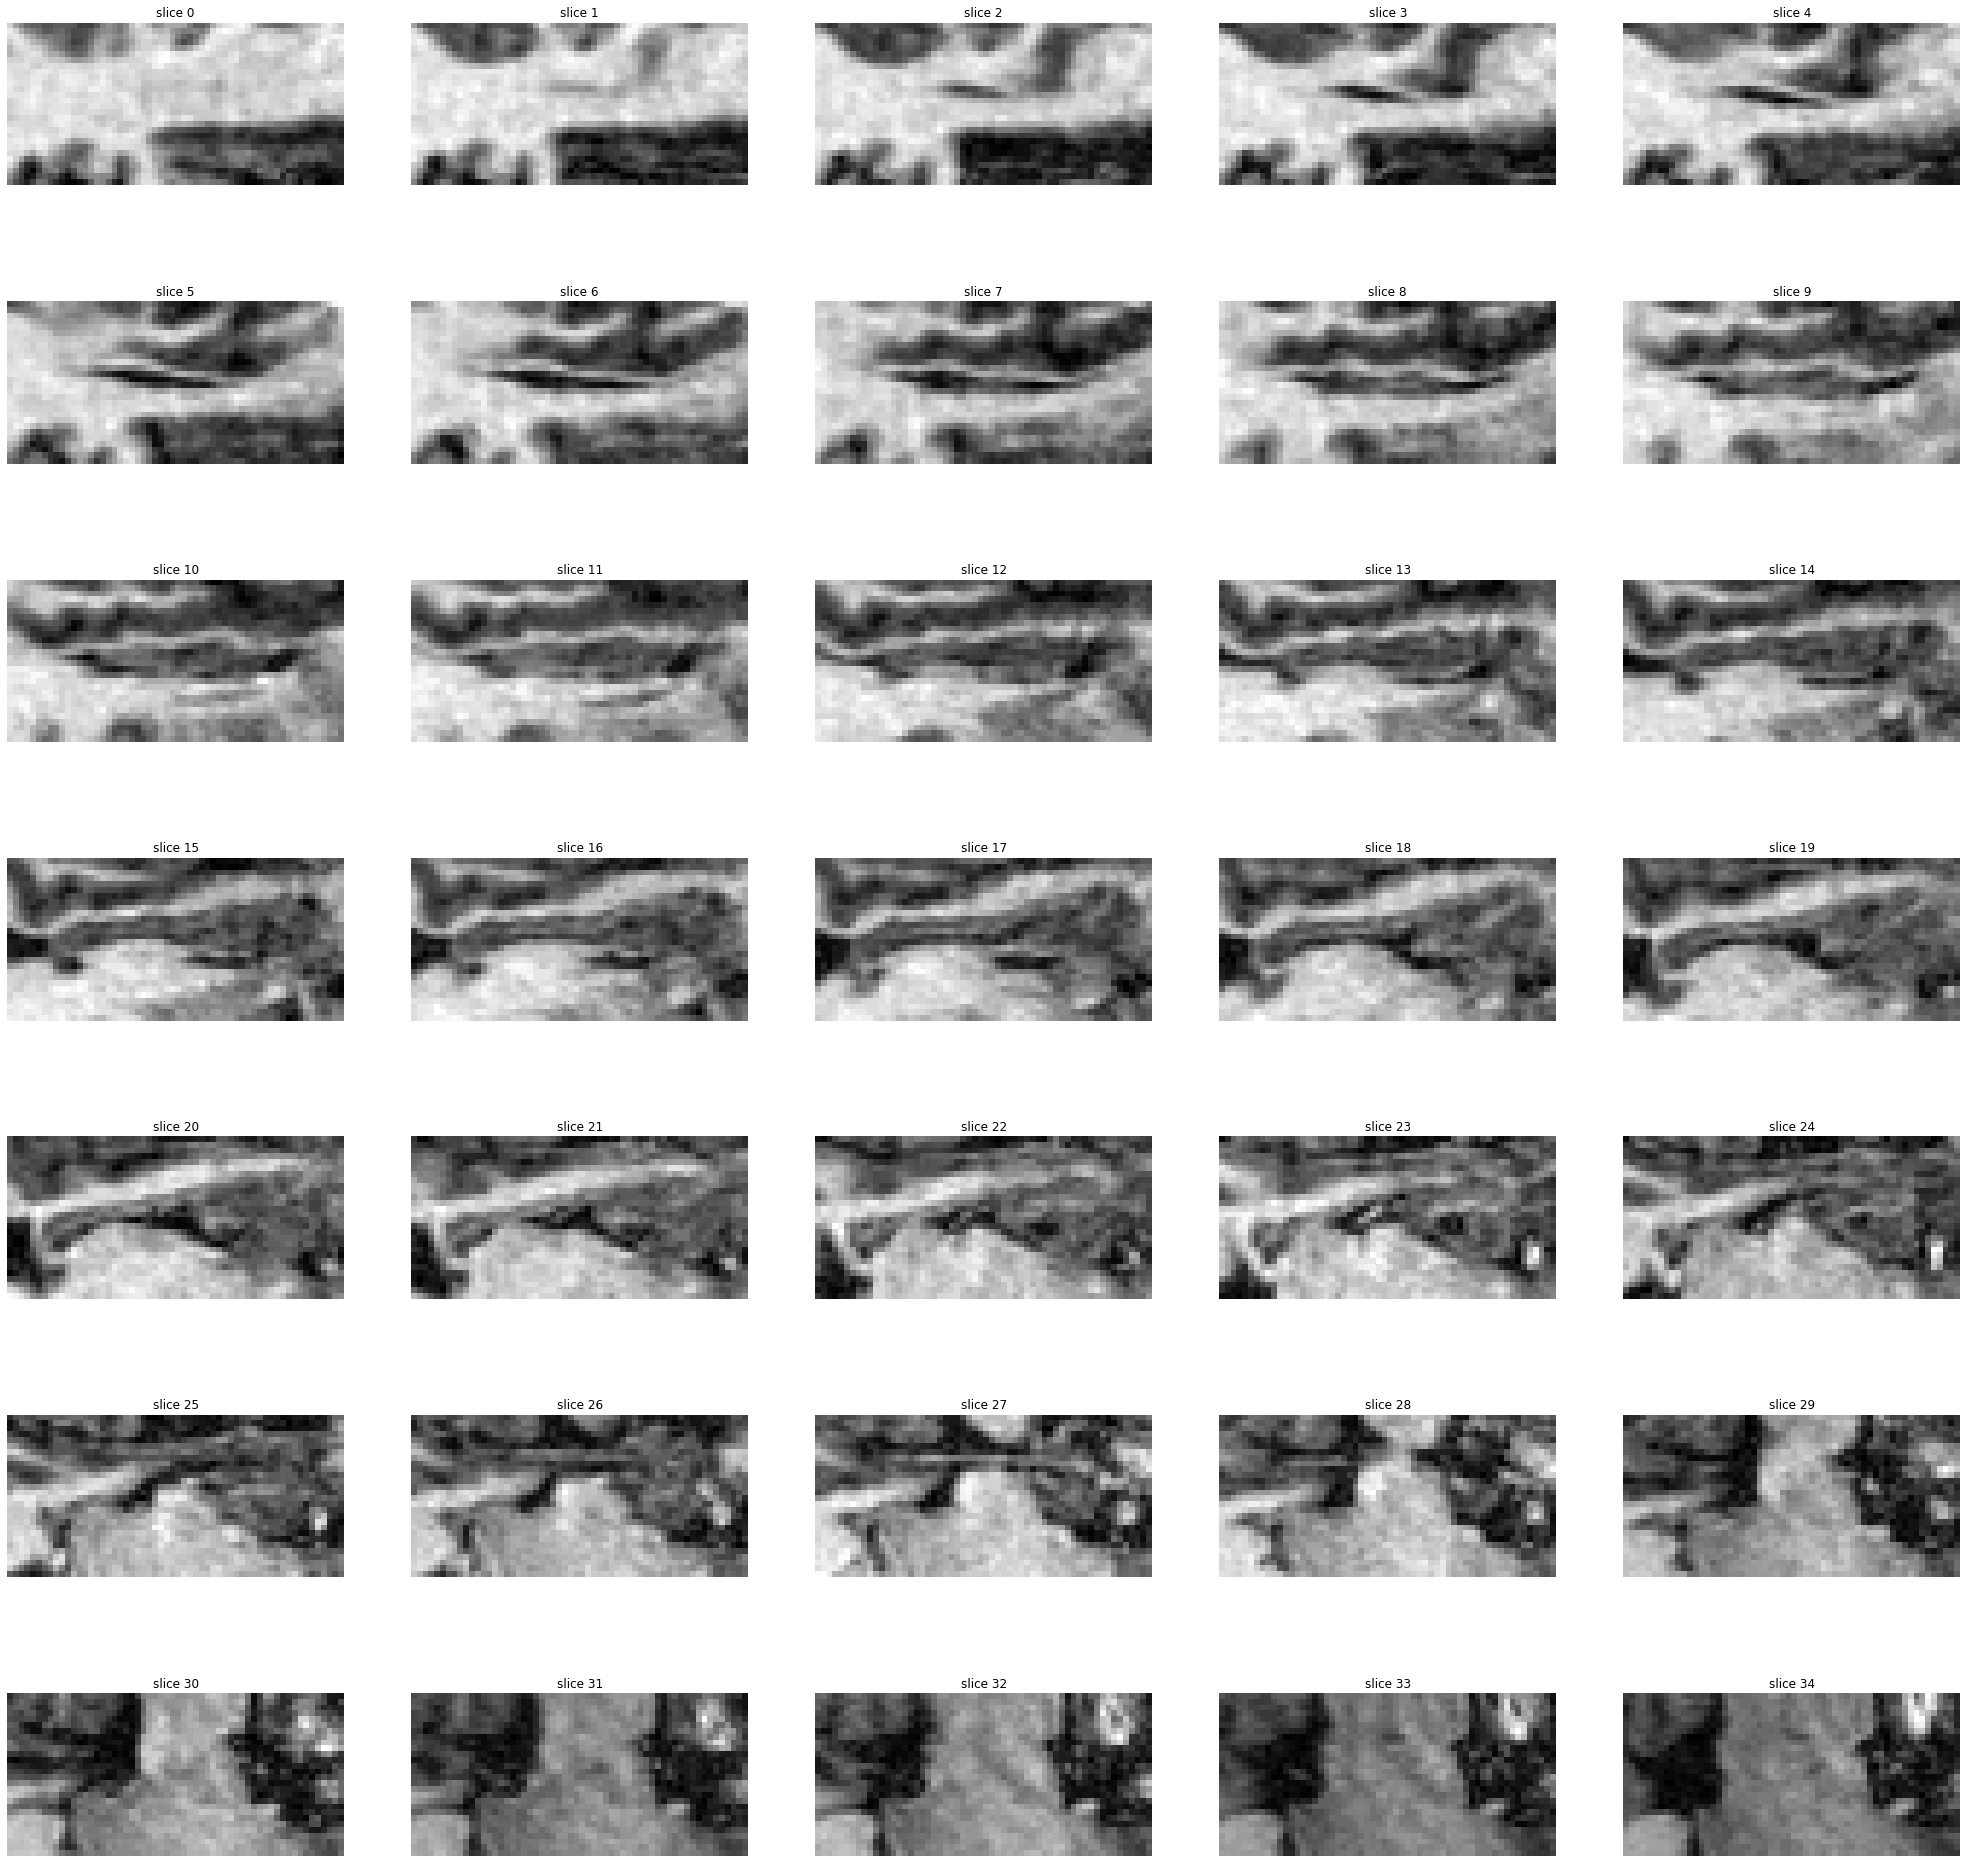

In [17]:
display_volume_slices(np.transpose(image_251,(0,2,1)), 5,7)

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [18]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# confirm if this is indeed the NIFTT format that we are dealing with
# Using .header_class attribute - what is the format of our images?
img = nib.load(path+'/images/hippocampus_001.nii.gz')
img_hdr = img.header_class
print(img_hdr)

<class 'nibabel.nifti1.Nifti1Header'>


In [19]:
print(img)
# OR alternatively
# just print header section
# hdr = img.header
# print(hdr)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (35, 51, 35)
affine: 
[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 0. 0. 1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
q

This format of our images is NifTI 1 - ends with magic.

Examining the 'dim' property of the header, the second dimension is the sagittal plane, the third coronal, and the forth axial.  Or, simply, we can look at the data.shape property of the image and find data shape (35, 51, 35) corresponding to (sagittal, coronal, axial).

In [20]:
hdr = img.header
hdr.get_data_shape()  # sagittal, coronal, axial

(35, 51, 35)

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [21]:
# How many bits per pixel are used?
print(f"There are {hdr['bitpix']} bits per pixel.")

There are 8 bits per pixel.


In [22]:
# What are the units of measurement?
print(f'The units of measurement are {hdr.get_xyzt_units()}')

The units of measurement are ('mm', 'sec')


In [23]:
print(f"Also one could find the xyzt_units property in the header indicated as {hdr['xyzt_units']}.")

Also one could find the xyzt_units property in the header indicated as 10.


From Knowledge Base:

The xyzt_units contains the dimension of the grid spacing in voxels.This field needs to be converted to binary (i.e., base 2) according to the endianness. Then the first 3 bits are units for space, the next 3 are units for time. What you have is 2 + 8, indicating milimetres and seconds, that in base 2 is: [0 1 0 1 0 0 0 0] = 10, where [0 1 0 0 0 0 0 0] = 2 and [0 0 0 1 0 0 0 0] = 8.

Again, see complete documentation here: https://brainder.org/2012/09/23/the-nifti-file-format/

Both spatial and temporal measurement units, used for the dimensions dim[1] to dim[4] (and, respectively, for pixdim[]), are encoded in the field char xyzt_units. The bits 1-3 are used to store the spatial dimensions, the bits 4-6 are for temporal dimensions, and the bits 6 and 7 are not used. A temporal offset can be specified in the field float toffset. The codes for xyzt_units, in decimal, are:

    Unit 	           Code
    Unknown               0
    Meter (m) 	        1
    Milimeter (mm) 	   2
    Micron (µm) 	      3
    Seconds (s) 	      8
    Miliseconds (ms) 	16
    Microseconds (µs)    24
<!--     
| Unit | Code |
| :- | -: |
| Unknown |  0 |
| Meter (m) | 1 |
| Milimeter (mm)| 2 |
| Micron (µm) | 3 |
| Seconds (s) | 8 |
| Miliseconds (ms) | 16 |
| Microseconds (µs) | 24 | -->

In [24]:
# Do we have a regular grid? What are grid spacings?
print(f"The grid spacings are {hdr['pixdim']}.   It is a regular grid.")

The grid spacings are [1. 1. 1. 1. 1. 0. 0. 0.].   It is a regular grid.


From Nifti Documentation: (https://www.nitrc.org/docman/view.php/26/64/nifti1.h)

   In NIFTI-1 files, dimensions 1,2,3 are for space, dimension 4 is for time,
   and dimension 5 is for storing multiple values at each spatiotemporal
   voxel.

In [ ]:
# What dimensions represent axial, sagittal, and coronal slices? How do you know?

Dimensions are presented as (sagittal, coronal, axial) deduced and confirmed from 3D Slicer and nifti documentation.  Nibabel and NifTI use the 'RAS' output space going from 0) Right/Left (Sagittal), 1) Anterior/Posterior (Coronal), 2) Superior/Inferior (Axial).  Further described in reference to the Montreal Neurological Institute (MNI) template space as below:

* The origin (0, 0, 0) point is defined to be the point that the anterior commissure of the MNI template brain crosses the midline (the AC point).
* Axis units are millimeters.
* The Y axis follows the midline of the MNI brain between the left and right hemispheres, going from posterior (negative) to anterior (positive), passing through the AC point. The template defines this line.
* The Z axis is at right angles to the Y axis, going from inferior (negative) to superior (positive), with the superior part of the line passing between the two hemispheres.
* The X axis is a line going from the left side of the brain (negative) to right side of the brain (positive), passing through the AC point, and at right angles to the Y and Z axes. 

In [25]:
# By now wehave enough information to decide what are dimensions of a single voxel
# Compute the volume (in mm³) of a hippocampus using one of the labels loaded. 
# Should get a number between ~2200 and ~4500
mask_volume = np.sum((label> 0).astype(int))
print(f'The volume of the hippocampus is the sum of all voxels in the mask: {mask_volume}')

The volume of the hippocampus is the sum of all voxels in the mask: 2948


## Plotting some charts

In [26]:
def get_data(label_path):
    return nib.load(label_path).get_fdata()

def get_volume(mask):
    return np.sum((mask > 0))

#### Find volume outliers

In [27]:
# Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.
label_paths  = glob(os.path.join(path, 'labels', '*.nii.gz'))

volumes = []
outliers = []
for label in label_paths:
    label_data = get_data(label)
    label_vol = get_volume(label_data)
    if label_vol > 4700 or label_vol < 1900:
        outliers.append(label)
    volumes.append(label_vol)
    
volumes.sort()
print('type:' , type(volumes[0]), '\nlength: ', len(volumes))
print(f'\nvolumes:\n{volumes}')
print(f'\noutliers:\n{outliers}')

type: <class 'numpy.int64'> 
length:  262

volumes:
[2382, 2397, 2416, 2422, 2448, 2451, 2471, 2475, 2532, 2534, 2535, 2546, 2570, 2588, 2590, 2593, 2593, 2613, 2618, 2629, 2634, 2635, 2647, 2665, 2678, 2678, 2684, 2697, 2704, 2708, 2714, 2714, 2726, 2738, 2739, 2753, 2755, 2757, 2773, 2786, 2811, 2813, 2819, 2827, 2830, 2857, 2859, 2863, 2863, 2868, 2870, 2873, 2887, 2890, 2894, 2912, 2920, 2920, 2930, 2931, 2942, 2943, 2945, 2947, 2948, 2950, 2956, 2980, 2995, 3000, 3000, 3023, 3027, 3029, 3040, 3048, 3054, 3061, 3080, 3088, 3089, 3092, 3095, 3097, 3102, 3105, 3109, 3109, 3113, 3127, 3137, 3142, 3143, 3145, 3146, 3150, 3152, 3160, 3165, 3167, 3167, 3172, 3177, 3194, 3195, 3201, 3202, 3208, 3208, 3210, 3216, 3219, 3220, 3222, 3229, 3248, 3248, 3251, 3252, 3253, 3257, 3272, 3285, 3285, 3292, 3294, 3304, 3309, 3325, 3326, 3327, 3333, 3335, 3340, 3349, 3352, 3353, 3356, 3361, 3371, 3372, 3374, 3375, 3377, 3397, 3398, 3404, 3409, 3409, 3412, 3420, 3420, 3423, 3431, 3435, 3438, 3439, 3442,

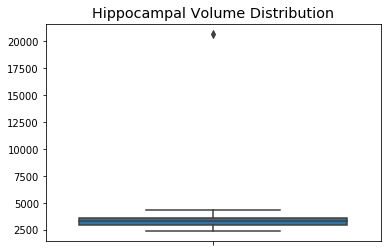

In [28]:
sns.boxplot(y=volumes)
plt.style.use('bmh')
plt.title('Hippocampal Volume Distribution');

In [29]:
# IQRs and Outliers
IQR = np.percentile(volumes,[75]) - np.percentile(volumes,[25])

print(
f'''
Quartiles w/ Outlier Boundaries: 
max: {1.5*IQR+np.percentile(volumes, [75])}
75:  {np.percentile(volumes,[75])}
50:  {np.percentile(volumes,[50])} 
25:  {np.percentile(volumes,[25])} 
min: {np.percentile(volumes, [25])-1.5*IQR}
''')

print(f'Outliers: volumes < {np.percentile(volumes, [25])-1.5*IQR} OR {1.5*IQR+np.percentile(volumes, [75])} < volumes')


Quartiles w/ Outlier Boundaries: 
max: [4639.625]
75:  [3626.75]
50:  [3330.] 
25:  [2951.5] 
min: [1938.625]

Outliers: volumes < [1938.625] OR [4639.625] < volumes


(array([35., 54., 79., 68., 22.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2382. ,  2748.4,  3114.8,  3481.2,  3847.6,  4214. ,  4580.4,
         4946.8,  5313.2,  5679.6,  6046. ,  6412.4,  6778.8,  7145.2,
         7511.6,  7878. ,  8244.4,  8610.8,  8977.2,  9343.6,  9710. ,
        10076.4, 10442.8, 10809.2, 11175.6, 11542. , 11908.4, 12274.8,
        12641.2, 13007.6, 13374. , 13740.4, 14106.8, 14473.2, 14839.6,
        15206. , 15572.4, 15938.8, 16305.2, 16671.6, 17038. , 17404.4,
        17770.8, 18137.2, 18503.6, 18870. , 19236.4, 19602.8, 19969.2,
        20335.6, 20702. ]),
 <a list of 50 Patch objects>)

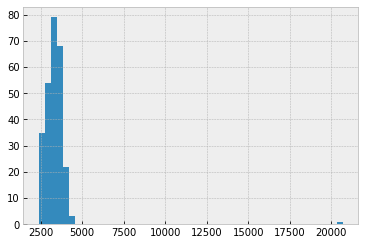

In [30]:
plt.hist(volumes, bins = 50)

The chart below shows hippocampal volume from around 2850 to 4650 mm cubed.  Our data looks commensurate, having all volumes between bins 2382 at a minimum and 4580 at a maximum, except for outlier showing a volume greater than 20,000 units.

<img src="img/nomogram_fem_right.svg" width="400" align="left" />

#### Find shape outliers

In [34]:
# Find any other images which may not conform in shape
image_paths  = glob(os.path.join(path, 'images', '*.nii.gz'))
label_paths = glob(os.path.join(path, 'labels', '*.nii.gz'))

lg_images = []
lg_labels = []
for image in image_paths:
    image_data = get_data(image)
    if image_data.shape[0] > 64:
        #print(image_data.shape)
        lg_images.append(image)
for f in label_paths:
    label_data = get_data(image)
    if label_data.shape[0] > 64:
        #print(label_data.shape)
        lg_labels.append(label)
    
print(lg_images)
print(lg_labels)

['../data/TrainingSet/images/hippocampus_010.nii.gz', '../data/TrainingSet/images/hippocampus_281.nii.gz']
[]


In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

We did find outliers that need to be eliminated.  As well, there are issues with the labels. The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [32]:
image_281 = nib.load(path+'/images/hippocampus_281.nii.gz').get_fdata()
label_281 = nib.load(path+'/labels/hippocampus_281.nii.gz').get_fdata()

image_010 = nib.load(path+'/images/hippocampus_010.nii.gz').get_fdata()
label_010 = nib.load(path+'/labels/hippocampus_010.nii.gz').get_fdata()

In [33]:
image_281.shape, label_281.shape, image_010.shape, label_010.shape

((512, 512, 31), (512, 512, 94), (512, 512, 241), (36, 50, 31))

### Inspect outlier volumes

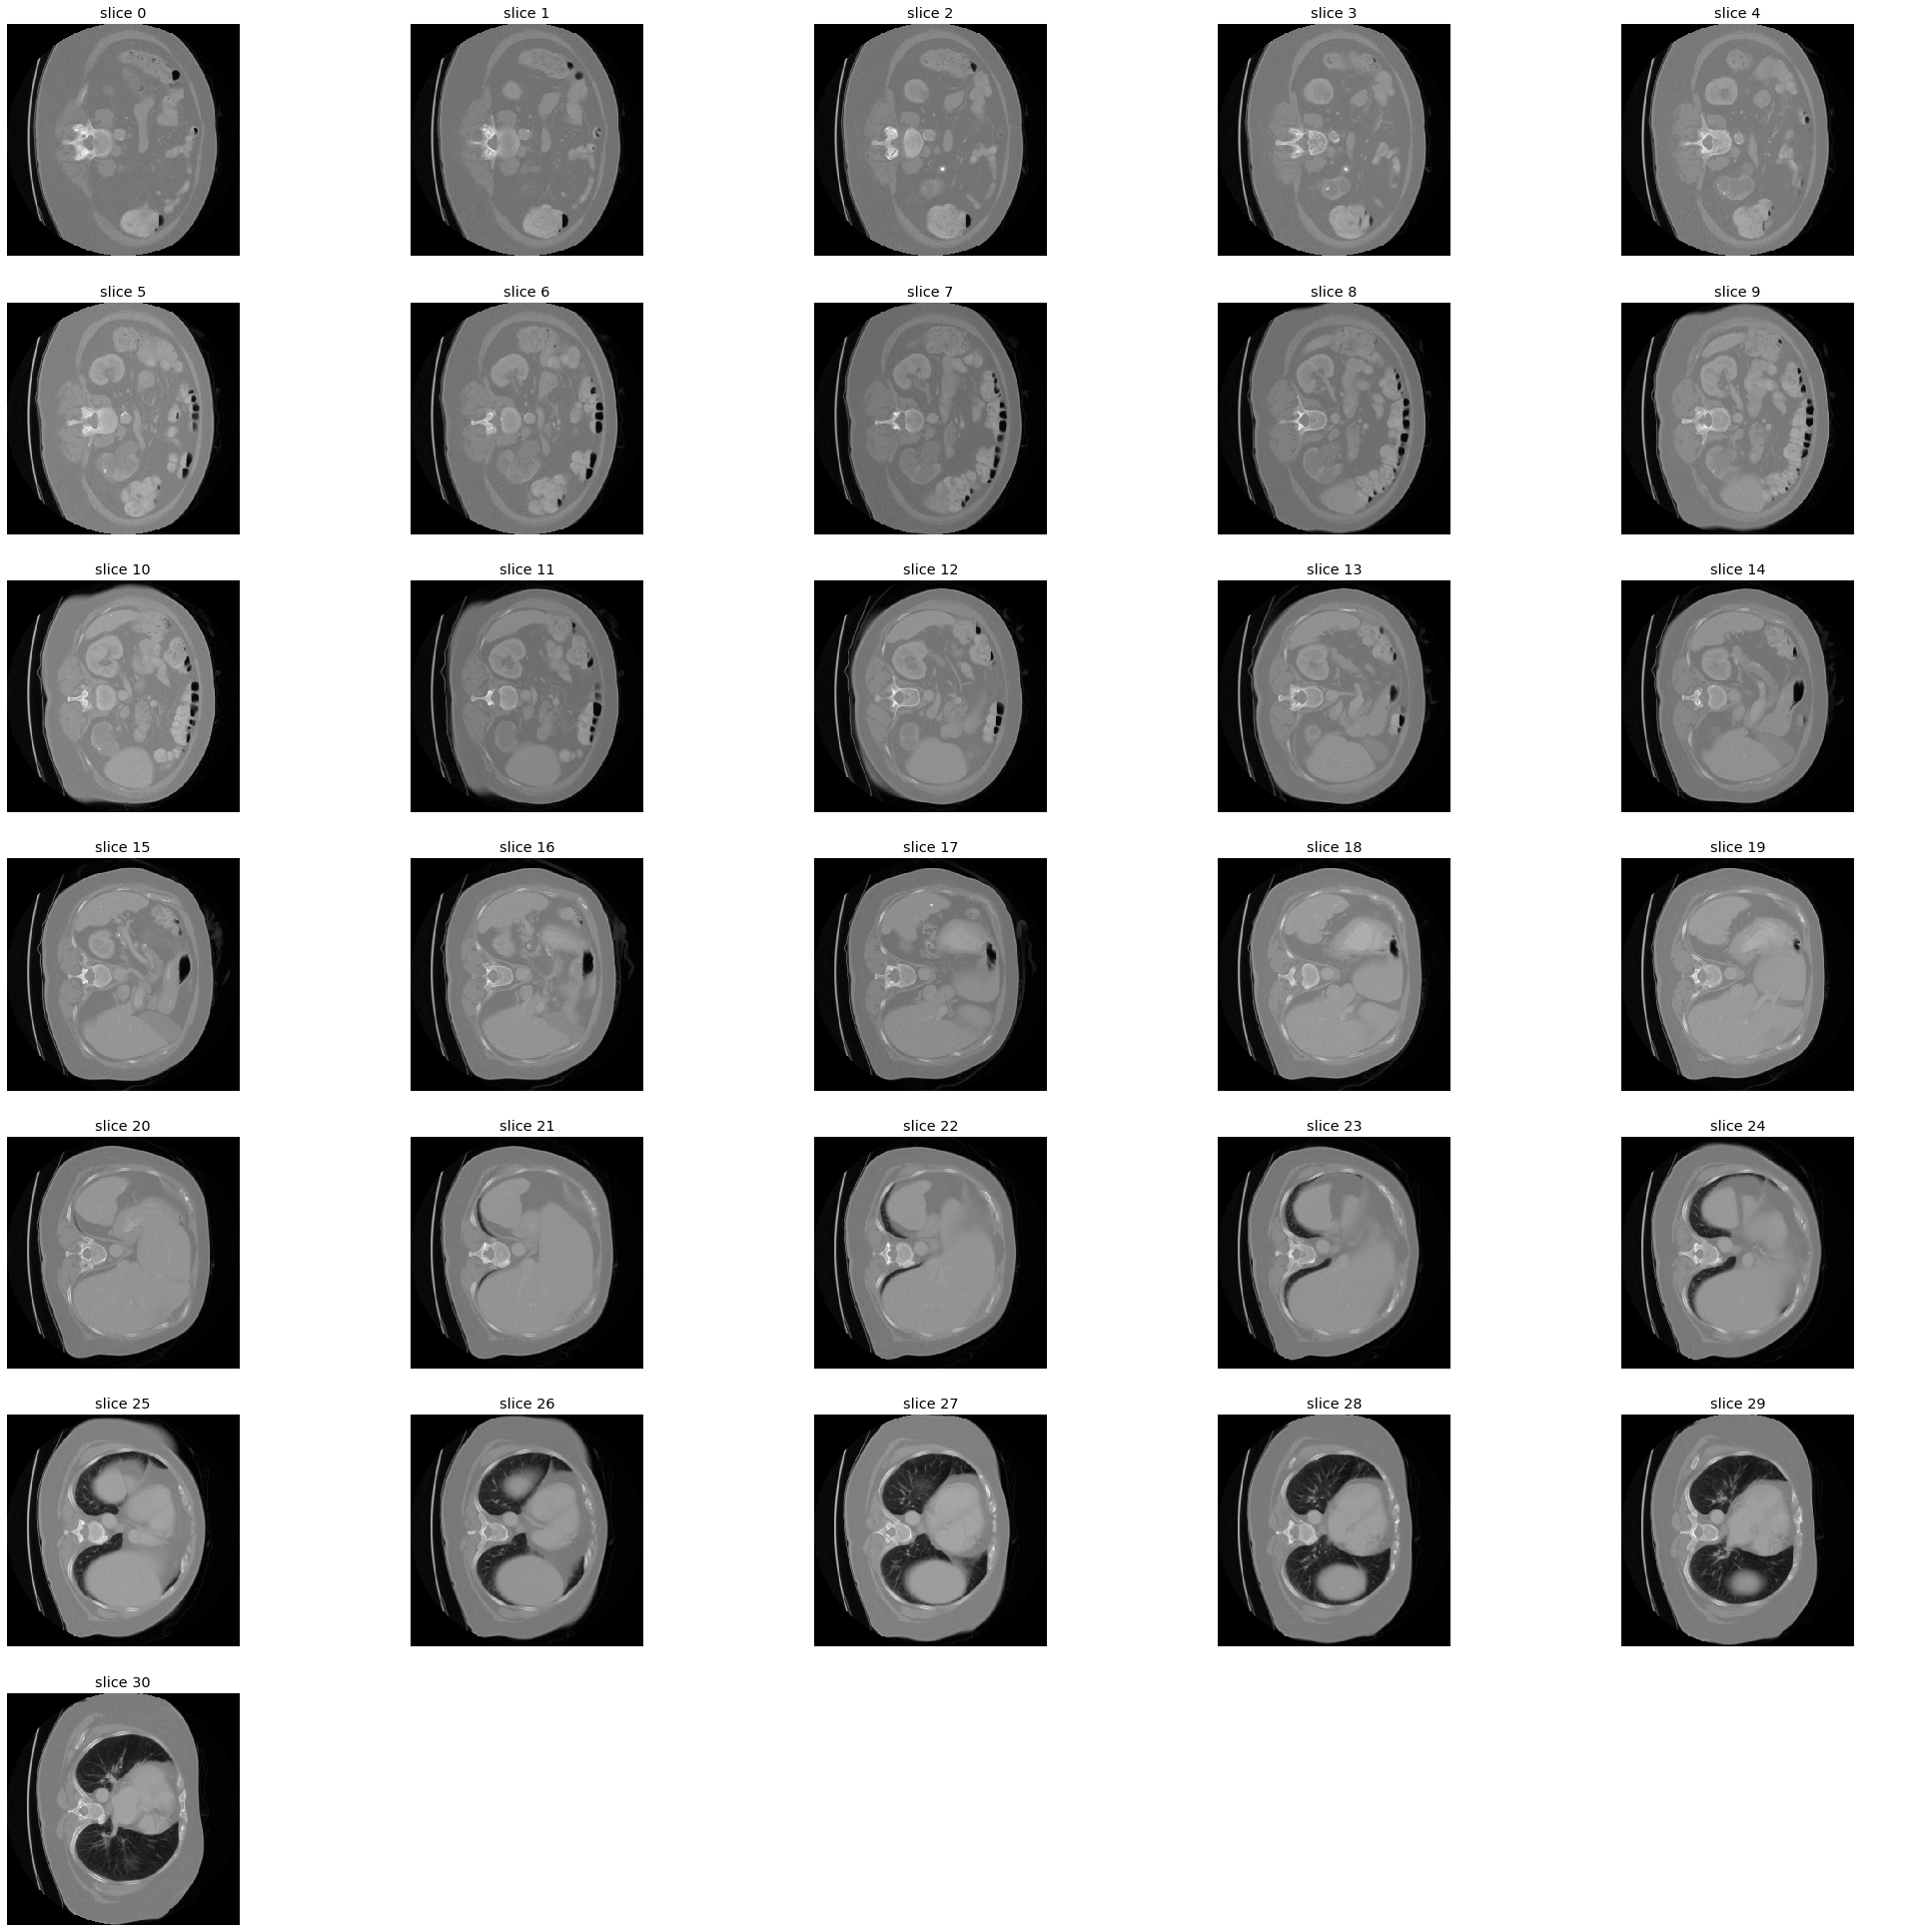

In [35]:
display_volume_slices(np.transpose(image_281,(2,0,1)), 5,7)

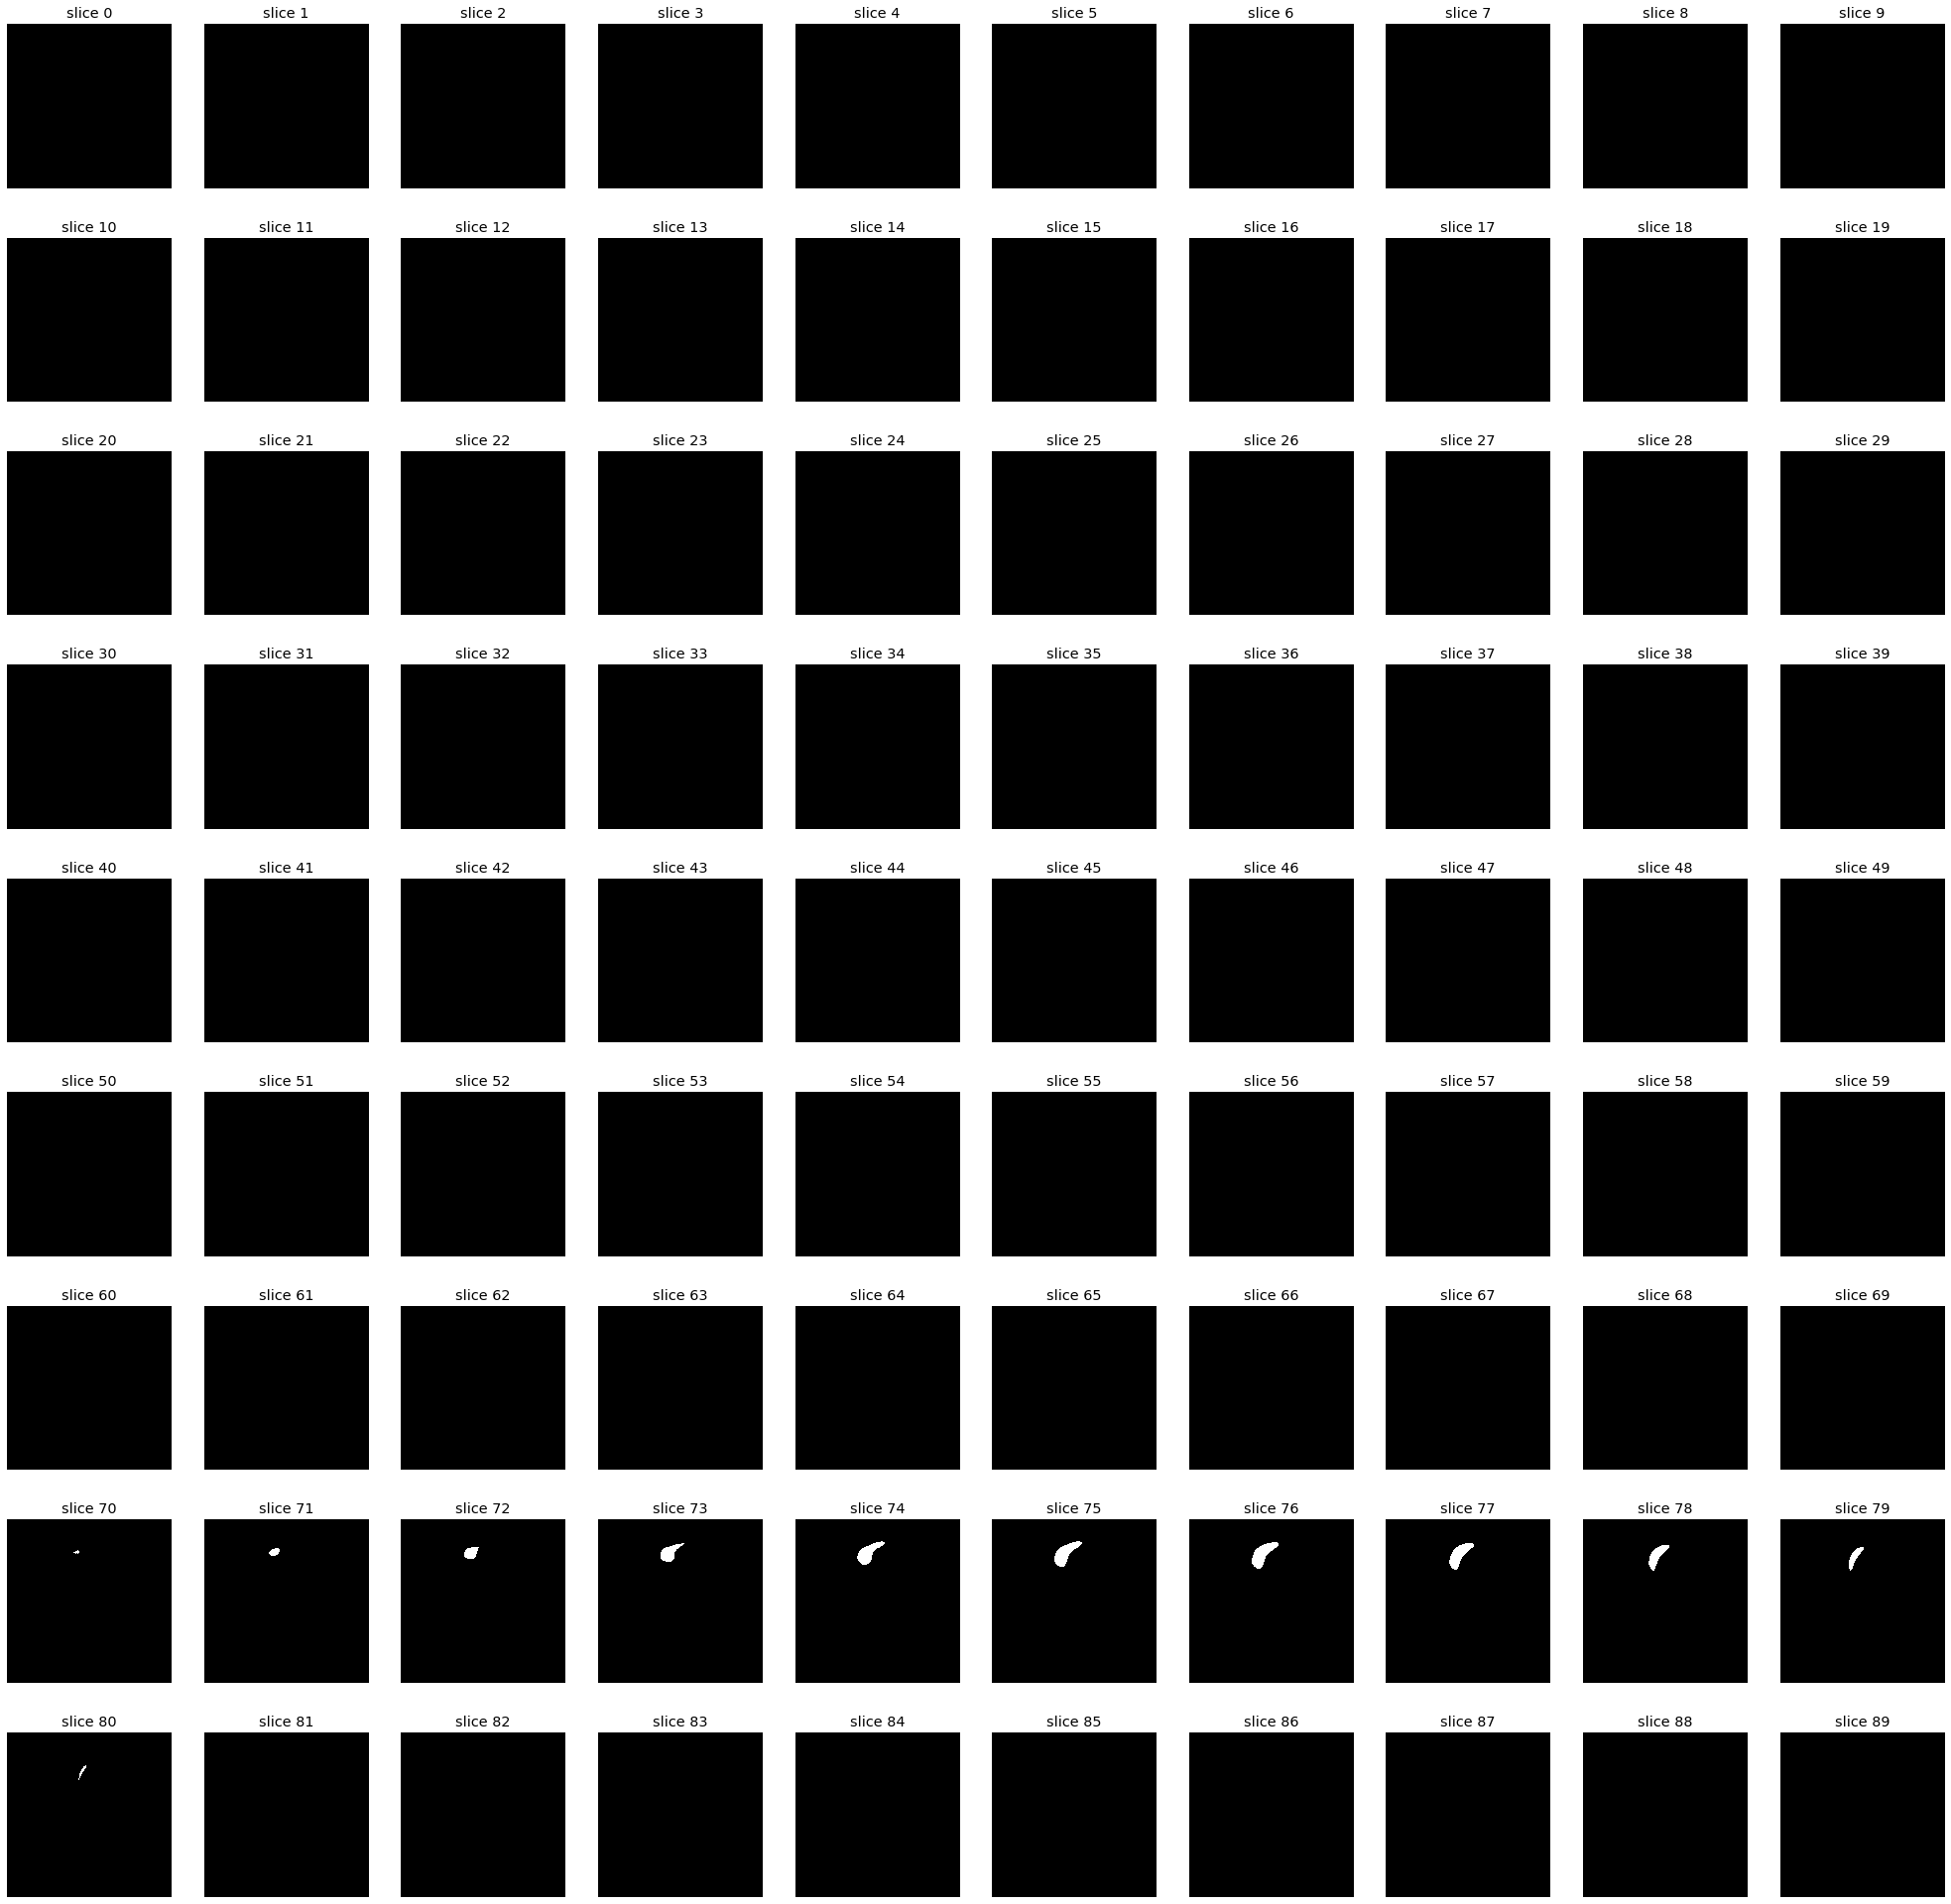

In [36]:
display_volume_slices(np.transpose(label_281,(2,0,1)),10,9)

Looks like volume 281 clearly does not belong!  

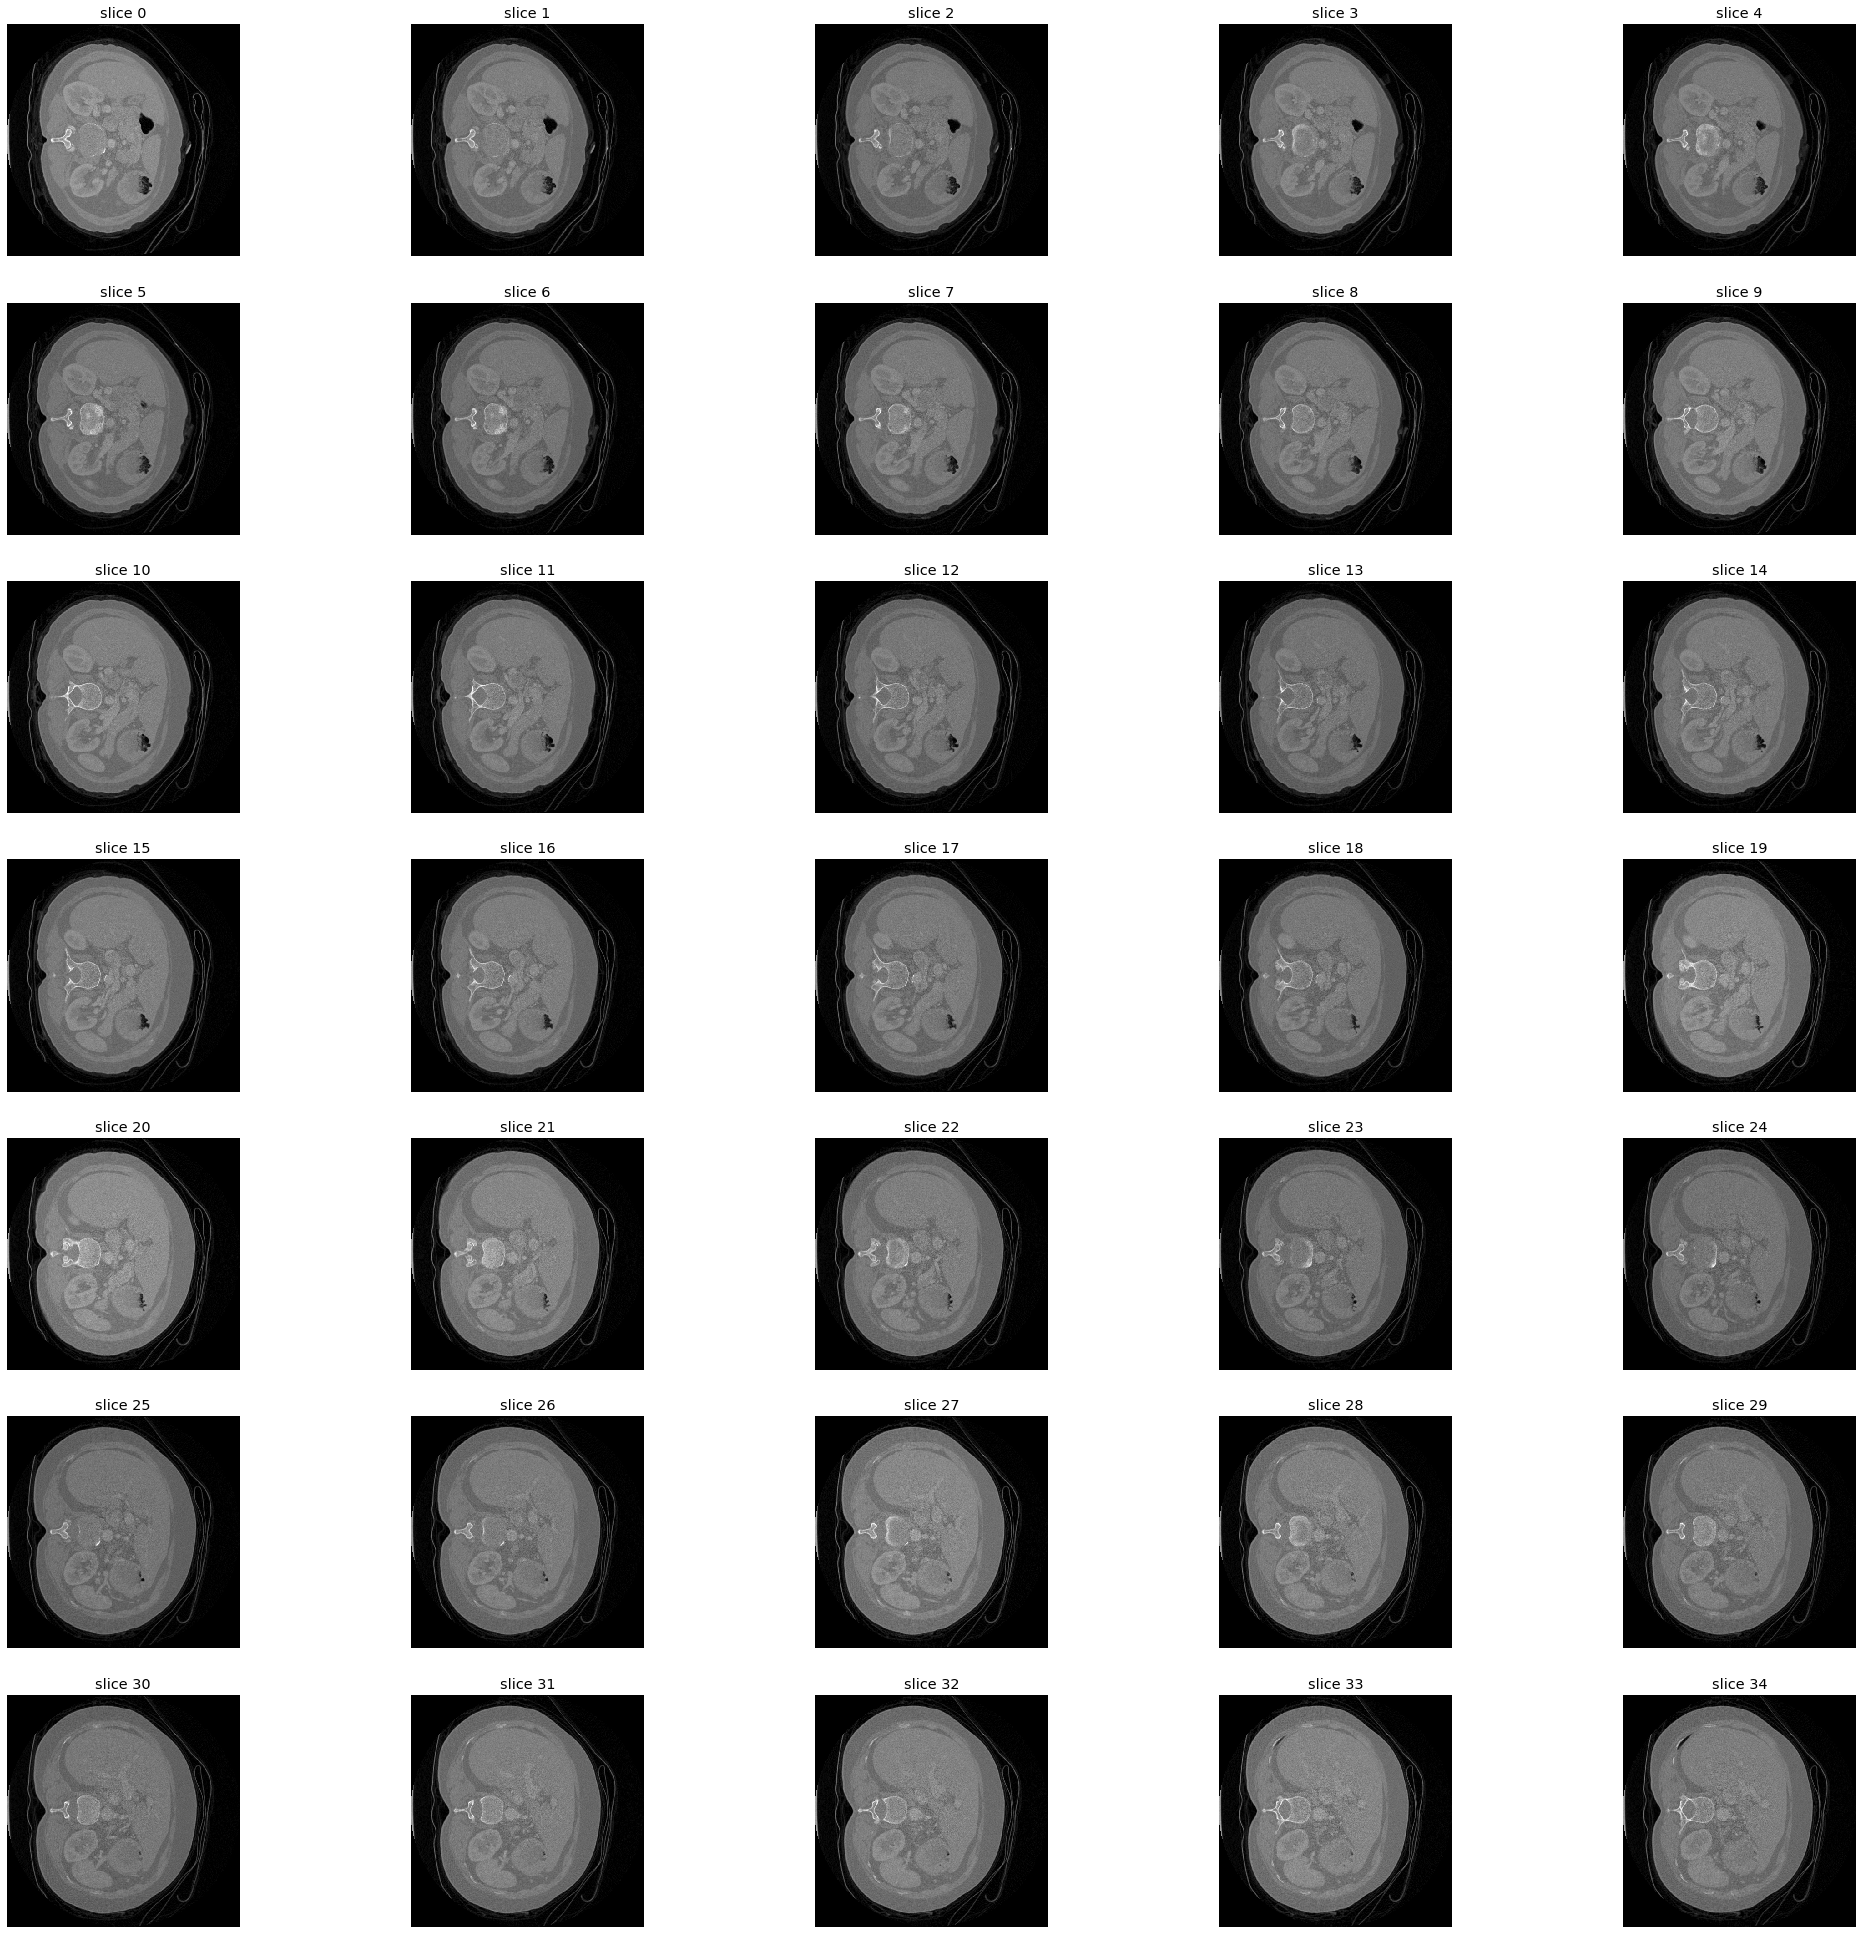

In [37]:
display_volume_slices(np.transpose(image_010,(2,0,1)), 5,7)

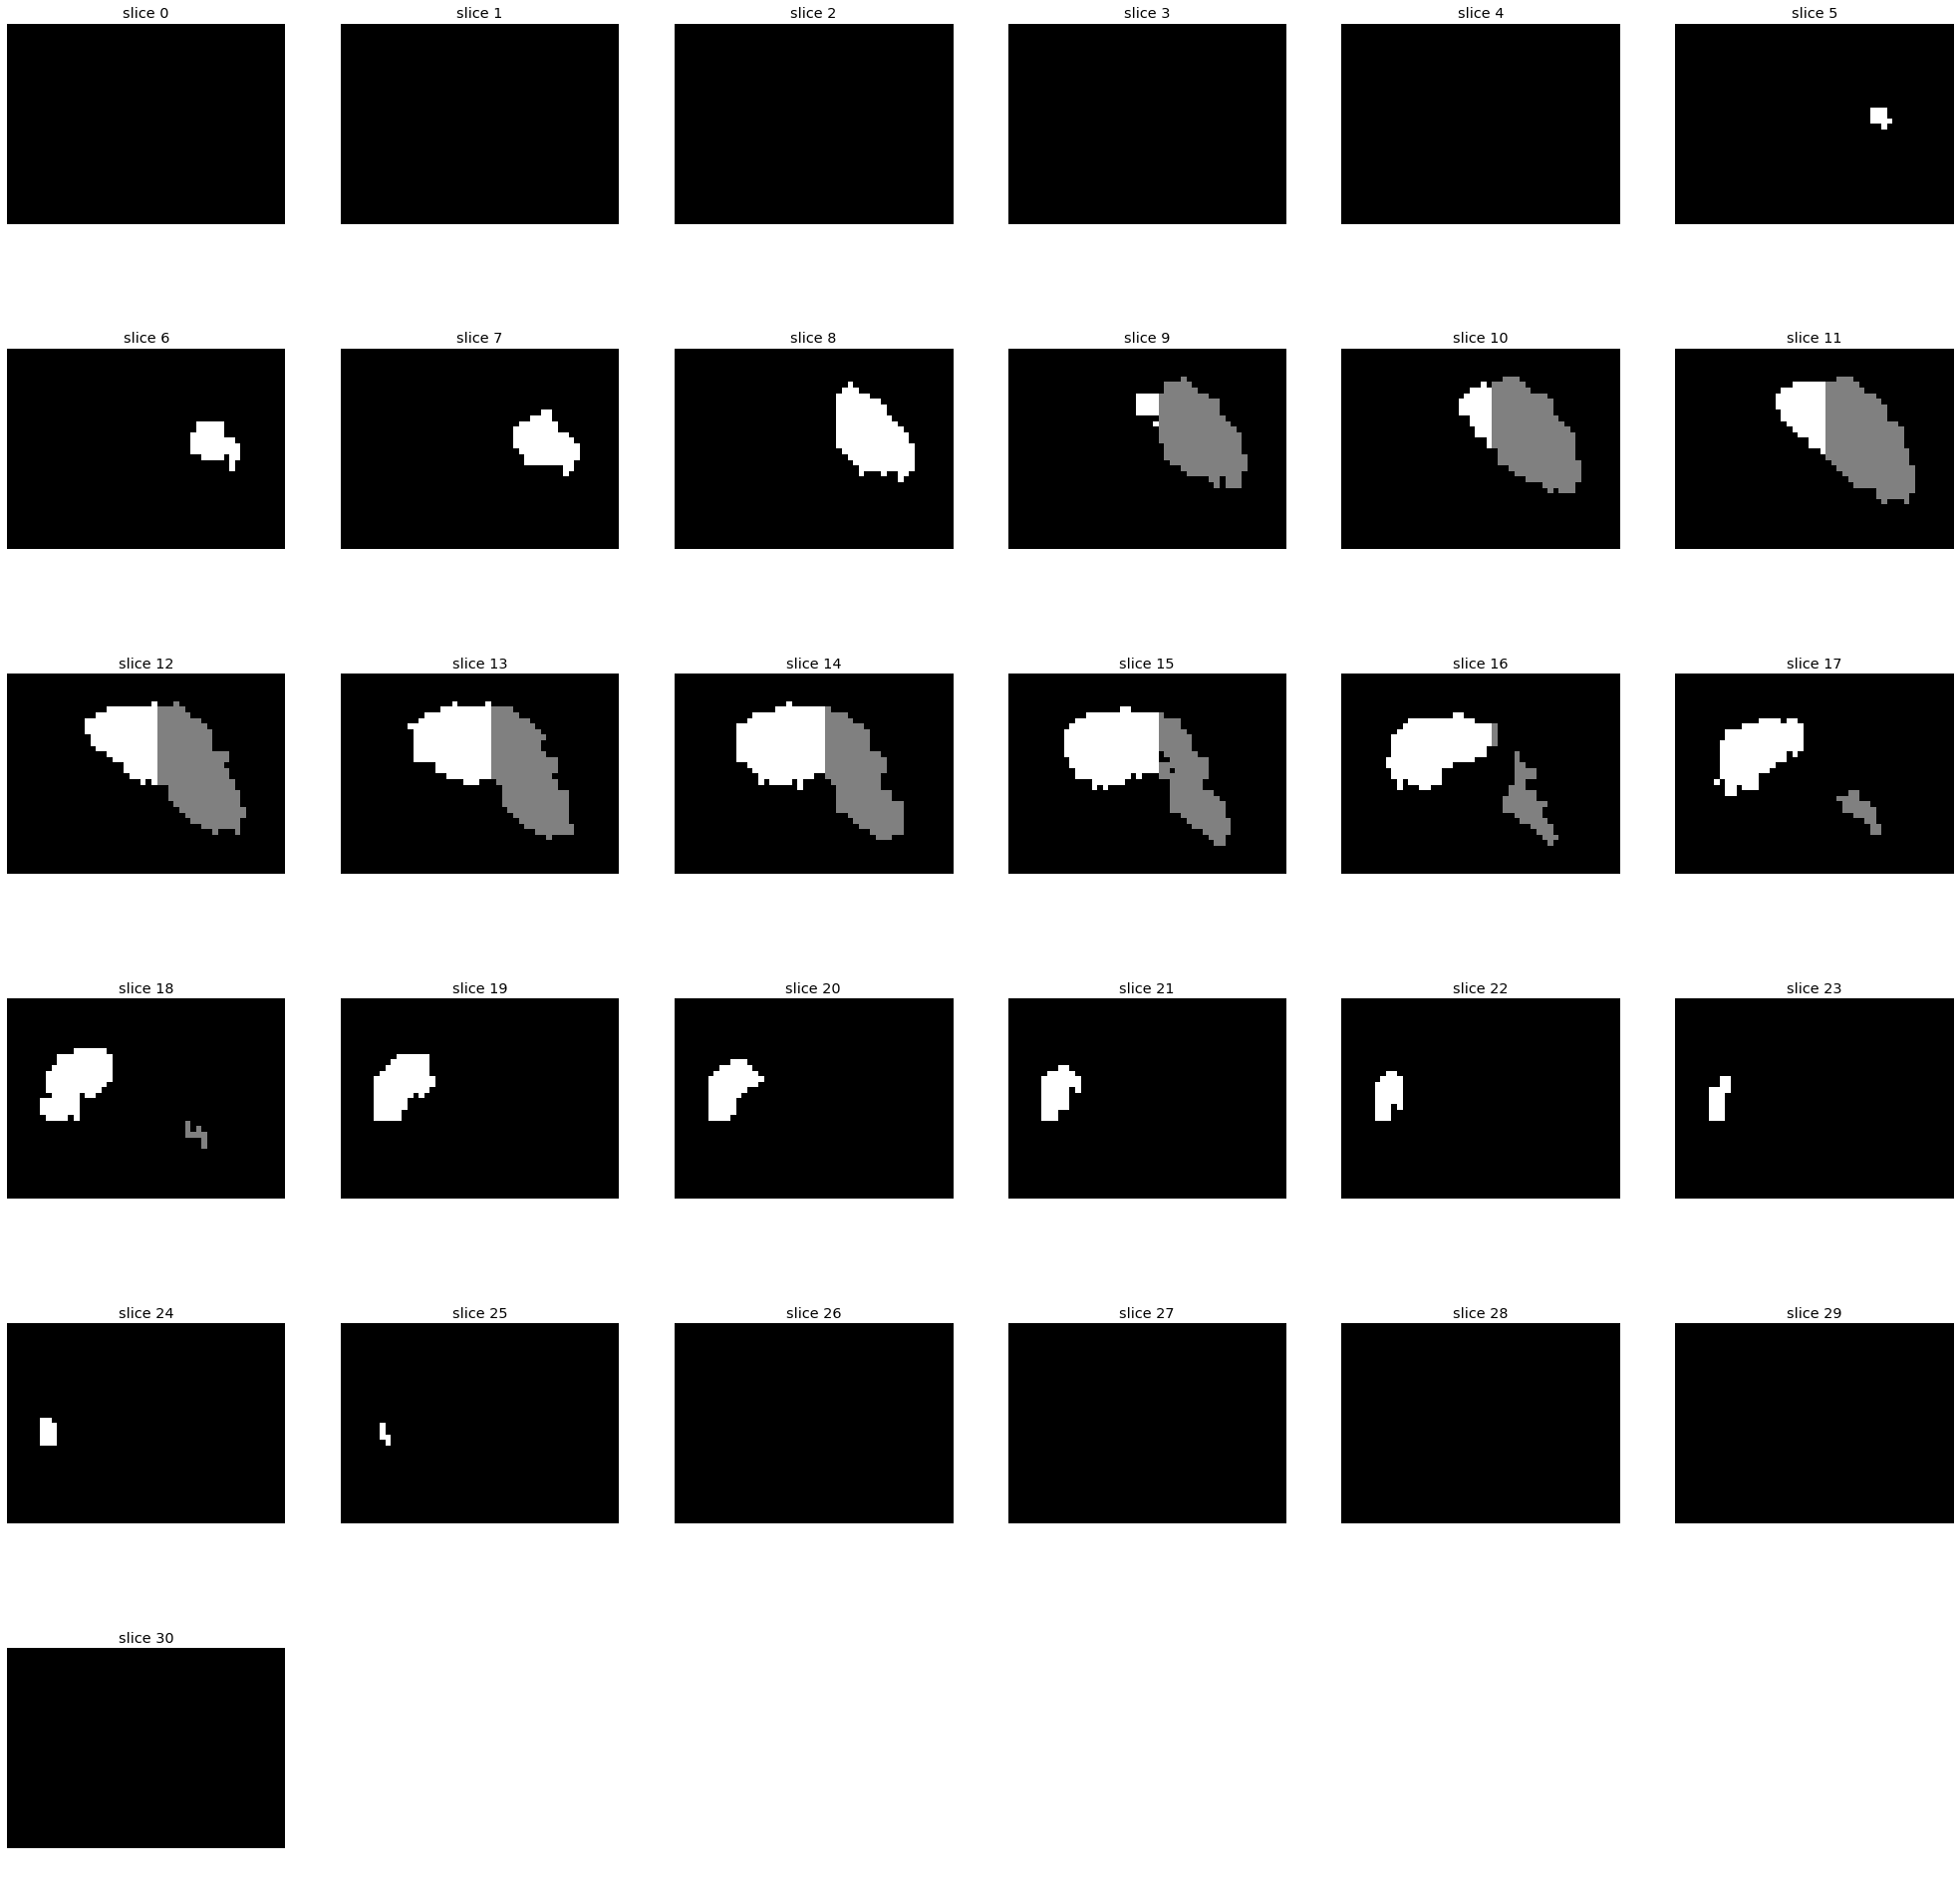

In [39]:
display_volume_slices(np.transpose(label_010,(2,0,1)),6,6) #looks okay - but image is wrong

For volume 010 the labels look correct, but clearly the image volume is mismatched and also doesn't belong.

In [40]:
len(images), len(labels)

(263, 262)

We have a different number of image and label volumes.

#### Find mismatched Image, Label volumes

In [41]:
# look for mismatched volume numbers
def match_files(path):
    item_number = path[-10:-7]
    return item_number
    
match_files('../data/TrainingSet/labels/hippocampus_001.nii.gz') == '001'

True

In [42]:
# get image and label volume numbers
image_numbers = [match_files(image) for image in images]
label_numbers = [match_files(label) for label in labels]
print(f'len image_numbers: {len(image_numbers)}')
print(f'len label_numbers: {len(label_numbers)}')

# check for duplicates
image_numbers_set = set(image_numbers)
label_numbers_set = set(label_numbers)
print(f'unique image numbers: {len(image_numbers_set)}')
print(f'unique label numbers: {len(label_numbers_set)}')
print(f'mismatched items (to remove): {list(set(image_numbers) - set(label_numbers))}')

len image_numbers: 263
len label_numbers: 262
unique image numbers: 263
unique label numbers: 262
mismatched items (to remove): ['118']


We need to remove volumes #281, #010 (errant torso/spleen volumes), and #118 with missing label.

In [46]:
# Copy the clean dataset to the output folder inside EDA/out.
from shutil import copy

images.remove('../data/TrainingSet/images/hippocampus_118.nii.gz')
images.remove('../data/TrainingSet/images/hippocampus_281.nii.gz')
labels.remove('../data/TrainingSet/labels/hippocampus_281.nii.gz')
images.remove('../data/TrainingSet/images/hippocampus_010.nii.gz')
labels.remove('../data/TrainingSet/labels/hippocampus_010.nii.gz')
print(len(images), len(labels))

for img in images:
    copy(img, './out/images')
    
for lbl in labels:
    copy(lbl, './out/labels')

260 260


## Final remarks

In this section we have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section we will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will create what we need to use the model in the clinical context and reason about its performance.